# Reading in Data

In [1]:
import pandas as pd
data = pd.read_csv('../data/Iowa_Liquor_sales_sample_10pct.csv')

In [2]:
data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [3]:
# renaming columns

columns = ['date', 'store_num', 'city', 'zip', 'county_num', 'county', 'category', 
           'category_name', 'vendor_num', 'item_num', 'item', 'bottle_vol', 'bottle_cost',
           'bottle_retail', 'bottles_sold', 'sale', 'liters_sold', 'gallons_sold']
data.columns = columns

In [4]:
data.shape

(270955, 18)

In [5]:
data.dtypes

date              object
store_num          int64
city              object
zip               object
county_num       float64
county            object
category         float64
category_name     object
vendor_num         int64
item_num           int64
item              object
bottle_vol         int64
bottle_cost       object
bottle_retail     object
bottles_sold       int64
sale              object
liters_sold      float64
gallons_sold     float64
dtype: object

In [6]:
data.isnull().sum()

date                0
store_num           0
city                0
zip                 0
county_num       1077
county           1077
category           68
category_name     632
vendor_num          0
item_num            0
item                0
bottle_vol          0
bottle_cost         0
bottle_retail       0
bottles_sold        0
sale                0
liters_sold         0
gallons_sold        0
dtype: int64

In [7]:
# removing dollar signs from respective columns

data.sale = data.sale.str.replace('$','')
data.bottle_cost = data.bottle_cost.str.replace('$', '')
data.bottle_retail = data.bottle_retail.str.replace('$', '')

In [8]:
# converting dollar columns to floats

data.sale = data.sale.astype(float)
data.bottle_cost = data.bottle_cost.astype(float)
data.bottle_retail = data.bottle_retail.astype(float)

In [9]:
# data.category = data.category.astype(str)
# data.county_num = data.county_num.astype(str)
data.store_num = data.store_num.astype(str)
data.vendor_num = data.vendor_num.astype(str)
data.item_num = data.item_num.astype(str)

In [10]:
data.date = pd.to_datetime(data.date)

In [11]:
data.isnull().sum()

# category and county_num still have null values, but are written as strings ('nan')

date                0
store_num           0
city                0
zip                 0
county_num       1077
county           1077
category           68
category_name     632
vendor_num          0
item_num            0
item                0
bottle_vol          0
bottle_cost         0
bottle_retail       0
bottles_sold        0
sale                0
liters_sold         0
gallons_sold        0
dtype: int64

In [12]:
data[data.duplicated()].shape

(35, 18)

In [13]:
data.drop_duplicates(inplace=True)

# drop duplicated values

# Exploring the Data

There is a lot missing data, I look for ways to handle these missing values and also create new columns that could be useful for further analysis.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8
%config InlineBackend.figure_format = 'retina'

In [15]:
data.describe()

,county_num,category,bottle_vol,bottle_cost,bottle_retail,bottles_sold,sale,liters_sold,gallons_sold
count,269843.000000,2.708520e+05,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000
mean,57.232087,1.043886e+06,924.821460,9.773185,14.675615,9.870157,128.888839,8.979525,2.372348
std,27.340941,5.016868e+04,493.087881,7.047075,10.570076,24.036382,382.990624,28.899832,7.634521
min,1.000000,1.011100e+06,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,31.000000,1.012200e+06,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000
50%,62.000000,1.031200e+06,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000
75%,77.000000,1.062310e+06,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,99.000000,1.701100e+06,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000


In [16]:
data.describe(include=['object', 'datetime'])

,date,store_num,city,zip,county,category_name,vendor_num,item_num,item
count,270920,270920,270920,270920,269843,270288,270920,270920,270920
unique,274,1400,385,415,99,71,116,2696,2173
top,2015-12-01 00:00:00,2633,DES MOINES,50010,Polk,VODKA 80 PROOF,260,36308,Black Velvet
freq,1554,2485,23719,7090,49092,35366,46825,2796,7232
first,2015-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains Iowa liquor sales information from January 2015 through March 2016. Each row represents how much of a certain product was sold at a store on specific day.

My goal is to build a linear regression model that will predict the sales for the rest of the 2016 calender year.

### Exploring category_names and categories

In [17]:
pd.options.display.max_rows = 100

In [18]:
data.category_name.fillna('unknown', inplace=True)
data.category.fillna('misc', inplace=True)

# replacing null values in category_name with 'unknown'

In [19]:
pd.DataFrame(data[['category', 'category_name', 'liters_sold']].groupby(['category', 'category_name']).liters_sold.sum())

,,liters_sold
category,category_name,
1011100.0,BLENDED WHISKIES,102699.17
1011200.0,STRAIGHT BOURBON WHISKIES,102365.00
1011250.0,SINGLE BARREL BOURBON WHISKIES,878.25
1011300.0,TENNESSEE WHISKIES,57686.65
1011400.0,BOTTLED IN BOND BOURBON,540.25
1011500.0,STRAIGHT RYE WHISKIES,8613.49
1011600.0,CORN WHISKIES,20.25
1011700.0,unknown,13.50
1012100.0,CANADIAN WHISKIES,337450.29


In [20]:
def categorize(low, high):
    x = [i for i in data.category if i >= low and i <=high]
    return list(set(x))

In [21]:
whiskies = categorize(1011100.0, 1012400.0)
tequila = categorize(1022100.0, 1022200.0)
vodka = categorize(1031080.0, 1032200.0)
gin = categorize(1041100.0, 1042100.0)
brandies = categorize(1051010.0, 1052100.0)  # includes cognac
rum = categorize(1062050.0, 1062500.0)

In [22]:
data['whiskies'] = [1 if i in whiskies else 0 for i in data.category]
data['tequila'] = [1 if i in tequila else 0 for i in data.category]
data['vodka'] = [1 if i in vodka else 0 for i in data.category]
data['gin'] = [1 if i in gin else 0 for i in data.category]
data['brandies'] = [1 if i in brandies else 0 for i in data.category]
data['rum'] = [1 if i in rum else 0 for i in data.category]

# created dummy variables for subcategories of liquor types!

In [23]:
data['subcat'] = ['whiskies' if i >= 1011100.0 and i <= 1012400.0
                  else 'tequila' if i >= 1022100.0 and i <= 1022200.0
                  else 'vodka' if i >= 1031080.0 and i <= 1032200.0
                  else 'gin' if i >= 1041100.0 and i <= 1042100.0
                  else 'brandies' if i >= 1051010.0 and i <= 1052100.0
                  else 'rum' if i >= 1062050.0 and i <= 1062500.0
                  else 'other' for i in data.category]

In [24]:
data.head()

,date,store_num,city,zip,county_num,county,category,category_name,vendor_num,item_num,...,sale,liters_sold,gallons_sold,whiskies,tequila,vodka,gin,brandies,rum,subcat
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1.0511e+06,APRICOT BRANDIES,55,54436,...,81.00,9.0,2.38,0,0,0,0,1,0,brandies
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1.0111e+06,BLENDED WHISKIES,395,27605,...,41.26,1.5,0.40,1,0,0,0,0,0,whiskies
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1.0112e+06,STRAIGHT BOURBON WHISKIES,65,19067,...,453.36,24.0,6.34,1,0,0,0,0,0,whiskies
3,2016-02-03,2501,AMES,50010,85.0,Story,1.0711e+06,AMERICAN COCKTAILS,395,59154,...,85.50,10.5,2.77,0,0,0,0,0,0,other
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1.03108e+06,VODKA 80 PROOF,297,35918,...,129.60,21.0,5.55,0,0,1,0,0,0,vodka


In [25]:
# exploring the unknown category names

In [26]:
data[data.category == 1011700.0].item.unique()

array(['American Born Moonshine Original',
       'American Born Moonshine Apple Pie'], dtype=object)

In [27]:
data[data.category == 1022200.0].item.value_counts()

Herradura Gold Reposado 6pak    42
Olmeca Altos Reposado            4
Sauza Cien Anos Reposado         4
Exotico Blanco                   4
1800 Silver                      2
Tres Generaciones Anejo          2
Peligroso Silver                 2
Exotico Reposado                 2
Casa Noble Reposado              1
Name: item, dtype: int64

In [28]:
data[data.category == 1032100.0].item.value_counts()

Svedka Vodka                               71
Stolichnaya Premium Vodka 80 Proof (lv)    14
Stolichnaya Premium Vodka 80 Prf           10
Svedka                                      5
Belvedere Vodka                             3
Ciroc Ten HA                                2
Absolut w/Ginger Beer                       2
Belvedere Intense Unfiltered                2
Stolichnaya Russian Vodka 80 Prf            2
La Collection Santa Claus                   1
High Stick Vodka                            1
Three Olives Cake Flavored Vodka            1
Name: item, dtype: int64

In [29]:
data[data.category == 1052100.0].item.value_counts()

Hennessy VS                 135
Hennessy Vs Cognac           68
Hennessy Black                8
Remy Martin VSOP              5
Hennessy Vs Cognac 100ml      4
Hennessy VSOP Privilege       3
Courvoisier Vsop Cognac       1
Name: item, dtype: int64

In [30]:
data[data.category == 1062400.0].item.value_counts()

Rondiaz Rum Spiced    7
Rondiaz Mini          1
Name: item, dtype: int64

In [31]:
data[data.category == 1062500.0].item.value_counts()

Captain Morgan Grapefruit               7
Captain Morgan Coconut                  6
Captain Morgan Pineapple                5
Blue Chair Bay Coconut Spiced           5
Gosling's Black Seal                    4
Blue Chair Bay Coconut                  3
Captain Morgan Pineapple Mini           3
Captain Morgan Coconut Mini             2
Blue Chair Bay Banana                   2
Rondiaz Rum Spiced Black Cherry Mini    1
Name: item, dtype: int64

In [32]:
data[data.category == 1082100.0].item.value_counts()

Disaronno Amaretto                                            28
Grand Marnier Cordon Rouge                                    27
Domaine de Canton                                              6
Licor 43                                                       5
D'usse VSOP                                                    5
Galliano Liqueur                                               4
Ricura Mini                                                    2
Il Tramonto Limoncello                                         2
Grand Marnier Raspberry Peach                                  2
Passoa Liqueur                                                 1
Giffard Creme de Pamplemousse Rose Pink Grapefruit Liqueur     1
Name: item, dtype: int64

In [33]:
data[data.category == 'misc'].item.value_counts()

Evan Williams Egg Nog                                         18
Templeton Rye w/Flask                                         10
Grey Goose w/2 Martini Glasses                                 8
Jack Daniels TN Honey & Jack Daniels TN Fire 750mls w/2Gls     5
Southern Comfort w/Shot Glass & Lanyard                        4
Bombay Sapphire w/Glass                                        4
Pinnacle Candy Cane Trial Pack                                 4
Gentleman Jack w/2 Glasses                                     3
Wild Turkey American Honey Shot Tap                            3
Disaronno Amaretto Cavalli Mignon 3-50ml Pack                  3
Crystal Head Aurora Vodka                                      1
Parkers Heritage Collection Malt Whiskey HA                    1
Woodford Reserve MC 1838 White Corn                            1
Knob Creek w/ Crystal Decanter                                 1
Rothman & Winter Orchard Peach                                 1
Glenfiddich 1963 Replica 

### Exploring incorrect information in Zip Code

In [34]:
pd.Series(data.zip.unique()).sort_values()

330    50002
92     50003
146    50006
48     50009
3      50010
200    50014
344    50020
35     50021
158    50022
84     50023
336    50025
119    50028
277    50033
8      50035
117    50036
373    50044
226    50046
342    50047
371    50048
209    50049
266    50054
365    50056
270    50058
232    50060
395    50061
282    50069
186    50071
372    50072
229    50075
231    50076
264    50107
247    50109
23     50111
120    50112
60     50115
340    50122
389    50123
30     50124
26     50125
67     50126
34     50129
381    50130
85     50131
292    50135
378    50136
135    50138
74     50140
237    50142
305    50144
338    50150
       ...  
6      52501
254    52531
208    52537
95     52544
190    52553
318    52554
96     52556
284    52565
377    52571
11     52577
407    52590
138    52591
77     52601
289    52623
346    52625
250    52626
168    52627
25     52632
128    52637
272    52639
58     52641
225    52653
133    52655
13     52656
136    52722
256    52726

In [35]:
# zip 56201 is in MN
# zip 712-2 is not a zip (most likely part of a phone number)

In [36]:
data[data.zip == '56201'].shape

(23, 25)

In [37]:
data[data.zip.str.contains('201')].zip.value_counts()

51201    976
50201    925
56201     23
Name: zip, dtype: int64

In [38]:
data[data.zip.str.contains('201')].groupby('zip').county.value_counts()

zip    county    
50201  Story         925
51201  O'Brien       976
56201  Des Moines     23
Name: county, dtype: int64

In [39]:
data[data.zip == '52601'].county.unique()

array(['Des Moines'], dtype=object)

In [40]:
data.zip.replace('56201', '52601', inplace=True)

## 56201 is in MN, replaced 56201 with 52601 

**Zip is entered as 712-2**

Most likely the first four digits of the phone number

In [41]:
data[data.zip == '712-2'].shape

(217, 25)

In [42]:
data[data.zip == '712-2'].store_num.unique()

# the store number associated with this zip

array(['4307'], dtype=object)

In [43]:
data[data.store_num == '4307'].zip.value_counts()

# does this store number have any different zip codes in our data?

712-2    217
Name: zip, dtype: int64

In [44]:
data[data.zip == '51529'].shape

(0, 25)

In [45]:
data.zip.replace('712-2', '51529', inplace=True)

# Dunlap has zip of 51529

### Exploring Counties

In [46]:
data.county.value_counts()

Polk             49092
Linn             23508
Scott            16676
Black Hawk       15078
Johnson          13189
Pottawattamie     9109
Story             8957
Woodbury          8562
Dubuque           7755
Cerro Gordo       6374
Des Moines        4089
Muscatine         3983
Clinton           3576
Wapello           3529
Dickinson         3413
Lee               3324
Webster           3154
Marshall          2996
Jasper            2833
Buena Vista       2748
Dallas            2708
Marion            2603
Warren            2465
Bremer            2243
Boone             2110
Poweshiek         2089
Clay              1917
Carroll           1915
Jones             1874
O'Brien           1720
Kossuth           1675
Hardin            1660
Buchanan          1607
Jackson           1587
Plymouth          1567
Washington        1549
Iowa              1343
Sioux             1329
Winneshiek        1310
Clayton           1261
Monona            1255
Cass              1195
Mahaska           1188
Page       

In [47]:
data[data.county.isnull()].head()

,date,store_num,city,zip,county_num,county,category,category_name,vendor_num,item_num,...,sale,liters_sold,gallons_sold,whiskies,tequila,vodka,gin,brandies,rum,subcat
135,2016-01-20,5222,CEDAR RAPIDS,52402,NaN,NaN,1.05101e+06,AMERICAN GRAPE BRANDIES,115,53214,...,115.92,9.00,2.38,0,0,0,0,1,0,brandies
198,2016-03-02,3820,SIOUX CITY,51103,NaN,NaN,1.03208e+06,IMPORTED VODKA,35,34359,...,90.00,2.40,0.63,0,0,1,0,0,0,vodka
272,2016-03-21,4222,EVANSDALE,50707,NaN,NaN,1.0623e+06,FLAVORED RUM,370,42716,...,33.72,2.25,0.59,0,0,0,0,0,1,rum
290,2016-03-21,5236,ANAMOSA,52205,NaN,NaN,1.0816e+06,WHISKEY LIQUEUR,421,64868,...,138.00,10.50,2.77,0,0,0,0,0,0,other
321,2016-02-23,4203,WAVERLY,50677,NaN,NaN,1.0511e+06,APRICOT BRANDIES,434,55084,...,127.92,9.00,2.38,0,0,0,0,1,0,brandies


In [48]:
cities_county_df = data[['city', 'county']].dropna()

In [49]:
cities_county_df.head()

,city,county
0,SUMNER,Bremer
1,DAVENPORT,Scott
2,CEDAR FALLS,Black Hawk
3,AMES,Story
4,BELMOND,Wright


In [50]:
cities_county_df.drop_duplicates(inplace=True)

In [51]:
cities_county_df.shape

(393, 2)

In [52]:
cities_county_df.isnull().sum()

city      0
county    0
dtype: int64

In [53]:
cities_county_df.city.value_counts()

BETTENDORF           2
CLIVE                2
NORTH LIBERTY        2
NEWTON               2
FORT DODGE           2
WEST DES MOINES      2
PERRY                2
OSKALOOSA            2
ACKLEY               2
STATE CENTER         2
CORNING              2
EVERLY               1
CARROLL              1
DENVER               1
STORM LAKE           1
CORALVILLE           1
GREENE               1
ARMSTRONG            1
HARLAN               1
ANKENY               1
NEW SHARON           1
ANAMOSA              1
ANTHON               1
LAKE PARK            1
MARCUS               1
GLIDDEN              1
CRESCENT             1
WOODWARD             1
WILTON               1
DELHI                1
EMMETSBURG           1
BOONE                1
Northwood            1
DOWS                 1
BLOOMFIELD           1
GOLDFIELD            1
SWISHER              1
AFTON                1
SPIRIT LAKE          1
PLEASANT HILL        1
SWEA CITY            1
GRUNDY CENTER        1
HAWARDEN             1
HUXLEY     

In [54]:
cities_two_counties = ['BETTENDORF', 'CLIVE', 'NORTH LIBERTY', 'NEWTON', 'FORT DODGE', 'WEST DES MOINES',
                       'PERRY', 'OSKALOOSA', 'ACKLEY', 'STATE CENTER', 'CORNING']

In [55]:
cities = [i for i in cities_county_df.city if i not in cities_two_counties]

# making list of city names that belong to one county

In [56]:
len(cities)

371

In [57]:
counties = {}
for i in cities:
    counties[i] = cities_county_df[cities_county_df.city == i].county.unique()[0]
    
# creating dictionary of cities and their counties

In [58]:
len(counties)

371

In [59]:
counties

{'ADAIR': 'Adair',
 'ADEL': 'Dallas',
 'AFTON': 'Union',
 'AKRON': 'Plymouth',
 'ALBIA': 'Monroe',
 'ALDEN': 'Hardin',
 'ALGONA': 'Kossuth',
 'ALLISON': 'Butler',
 'ALTA': 'Buena Vista',
 'ALTOONA': 'Polk',
 'AMES': 'Story',
 'ANAMOSA': 'Jones',
 'ANITA': 'Cass',
 'ANKENY': 'Polk',
 'ANTHON': 'Woodbury',
 'ARLINGTON': 'Fayette',
 'ARMSTRONG': 'Emmet',
 "ARNOLD'S PARK": 'Dickinson',
 'ARNOLDS PARK': 'Dickinson',
 'ATLANTIC': 'Cass',
 'AUDUBON': 'Audubon',
 'AURELIA': 'Cherokee',
 'AVOCA': 'Pottawattamie',
 'BALDWIN': 'Jackson',
 'BANCROFT': 'Kossuth',
 'BAXTER': 'Jasper',
 'BEDFORD': 'Taylor',
 'BELLE PLAINE': 'Benton',
 'BELLEVUE': 'Jackson',
 'BELMOND': 'Wright',
 'BEVINGTON': 'Madison',
 'BLOOMFIELD': 'Davis',
 'BLUE GRASS': 'Scott',
 'BONDURANT': 'Polk',
 'BOONE': 'Boone',
 'BRITT': 'Hancock',
 'BROOKLYN': 'Poweshiek',
 'BUFFALO': 'Scott',
 'BUFFALO CENTER': 'Winnebago',
 'BURLINGTON': 'Des Moines',
 'BUSSEY': 'Marion',
 'CAMANCHE': 'Clinton',
 'CAMBRIDGE': 'Polk',
 'CARLISLE': 'War

In [60]:
new_county_col = []
for i, j in enumerate(list(data.city)):
    if j in cities:
        new_county_col.append(counties[j])
    else:
        new_county_col.append(data.iloc[i].county)
        
# creating new list for to replace the county column

In [61]:
print data.shape
print len(new_county_col)

(270920, 25)
270920


In [62]:
data[data.city == 'WEST DES MOINES']

,date,store_num,city,zip,county_num,county,category,category_name,vendor_num,item_num,...,sale,liters_sold,gallons_sold,whiskies,tequila,vodka,gin,brandies,rum,subcat
10,2015-09-28,2648,WEST DES MOINES,50265,77.0,Polk,1.01125e+06,SINGLE BARREL BOURBON WHISKIES,65,19235,...,236.16,4.50,1.19,1,0,0,0,0,0,whiskies
59,2015-07-09,4068,WEST DES MOINES,50265,77.0,Polk,1.0113e+06,TENNESSEE WHISKIES,85,26821,...,13.59,0.50,0.13,1,0,0,0,0,0,whiskies
81,2015-11-09,2521,WEST DES MOINES,50265,77.0,Polk,1.03208e+06,IMPORTED VODKA,370,34368,...,152.88,21.00,5.55,0,0,1,0,0,0,vodka
108,2015-01-15,2648,WEST DES MOINES,50265,77.0,Polk,1.0122e+06,SCOTCH WHISKIES,240,5106,...,47.25,2.25,0.59,1,0,0,0,0,0,whiskies
168,2015-10-26,2535,WEST DES MOINES,50265,77.0,Polk,1.0312e+06,VODKA FLAVORED,260,77375,...,148.56,9.00,2.38,0,0,1,0,0,0,vodka
244,2015-11-24,4773,WEST DES MOINES,50265,77.0,Polk,1.0122e+06,SCOTCH WHISKIES,260,5329,...,195.00,0.75,0.20,1,0,0,0,0,0,whiskies
328,2015-03-23,2648,WEST DES MOINES,50265,77.0,Polk,1.01221e+06,SINGLE MALT SCOTCH,370,5036,...,404.88,9.00,2.38,1,0,0,0,0,0,whiskies
329,2015-12-14,3899,WEST DES MOINES,50266,77.0,Polk,1.0312e+06,VODKA FLAVORED,260,77740,...,148.56,9.00,2.38,0,0,1,0,0,0,vodka
333,2016-03-14,3806,WEST DES MOINES,50266,77.0,Polk,1.0622e+06,PUERTO RICO & VIRGIN ISLANDS RUM,35,43126,...,148.68,9.00,2.38,0,0,0,0,0,1,rum
413,2015-02-03,2619,WEST DES MOINES,50266,77.0,Polk,1.0312e+06,VODKA FLAVORED,380,40407,...,7.41,0.50,0.13,0,0,1,0,0,0,vodka


In [63]:
# REPLACING COUNTY COLUMN
data.county = new_county_col

In [64]:
data[data.county.isnull()].city.unique()

array(['NORTH LIBERTY', 'ACKLEY', 'TABOR', 'SEYMOUR', 'RUNNELLS',
       'FORT DODGE'], dtype=object)

In [65]:
counties['NORTH LIBERTY'] = 'Johnson'
counties['ACKLEY'] = 'Franklin'
counties['TABOR'] = 'Fremont'
counties['SEYMOUR'] = 'Wayne'
counties['RUNNELLS'] = 'Polk'
counties['FORT DODGE'] = 'Webster'
counties['BETTENDORF'] = 'Scott'
counties['NEWTON'] = 'Jasper'
counties['PERRY'] = 'Dallas'
counties['OSKALOOSA'] = 'Mahaska'
counties['STATE CENTER'] = 'Marshall'
counties['CORNING'] = 'Adams'

In [66]:
add_to_cities = ['NORTH LIBERTY', 'ACKLEY', 'TABOR', 'SEYMOUR', 'RUNNELLS', 'FORT DODGE', 'BETTENDORF',
                 'NEWTON', 'PERRY', 'OSKALOOSA', 'STATE CENTER', 'CORNING']
for i in add_to_cities:
    cities.append(i)

In [67]:
len(cities)

383

In [68]:
len(counties)

383

In [69]:
new_county_col = []
for i, j in enumerate(list(data.city)):
    if j in cities:
        new_county_col.append(counties[j])
    else:
        new_county_col.append(data.iloc[i].county)

In [70]:
# REPLACING COUNTY COLUMN
data.county = new_county_col

In [71]:
data[data.county.isnull()].city.unique()

array([], dtype=object)

# Plotting Histograms

**Bottle Volume Histogram**

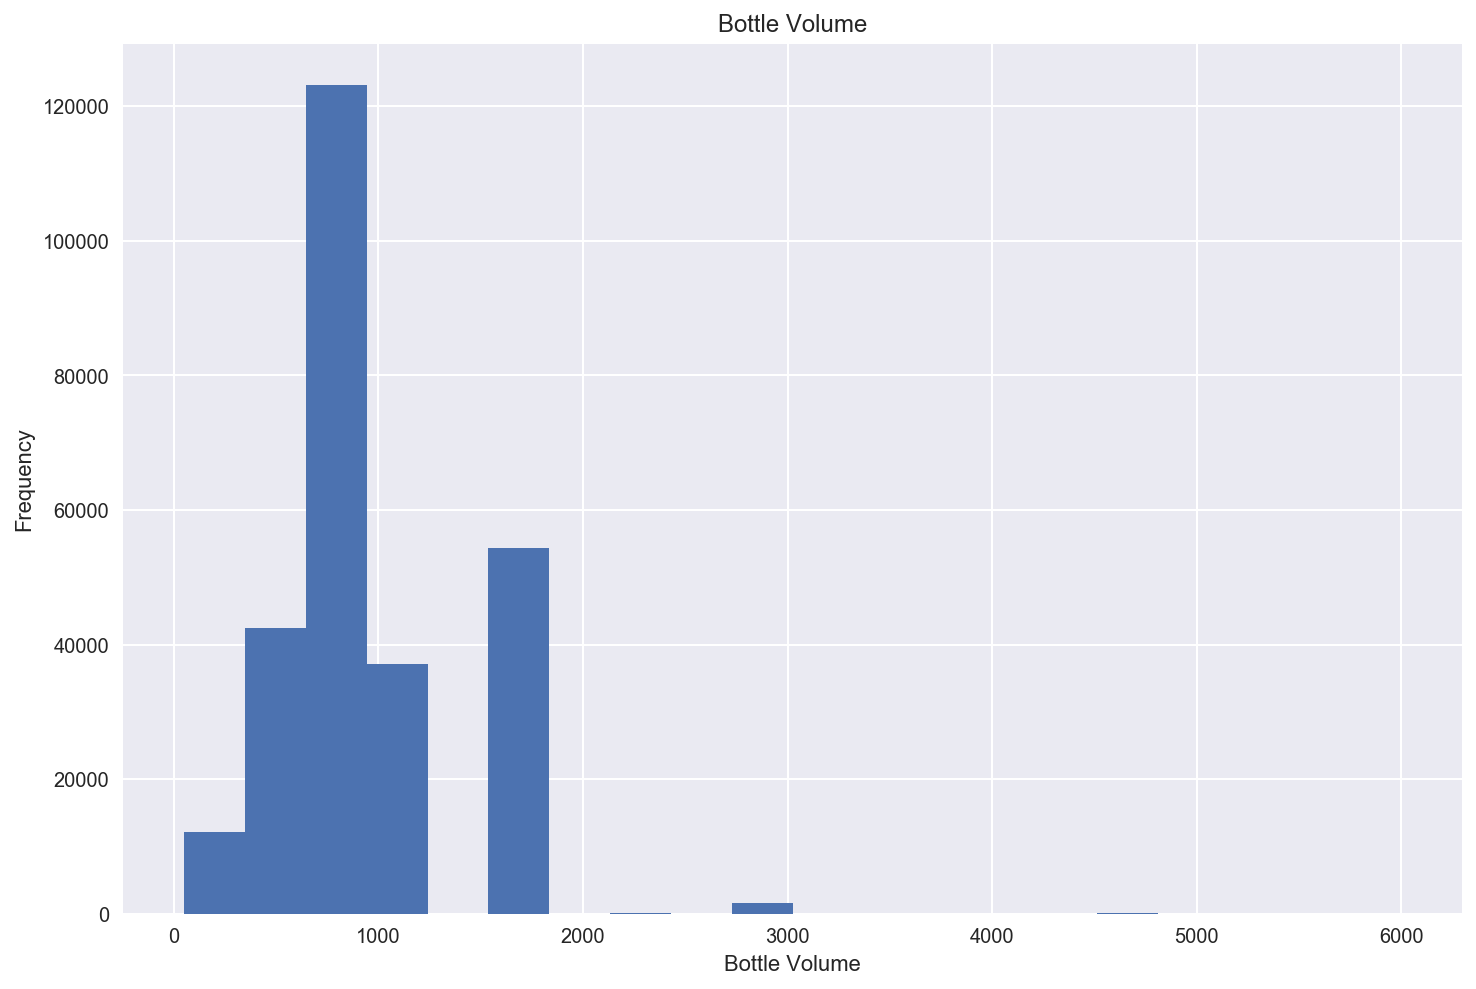

In [72]:
data.bottle_vol.plot(kind='hist', bins=20)
plt.xlabel('Bottle Volume')
plt.title('Bottle Volume')

**Bottle Cost Histograms**

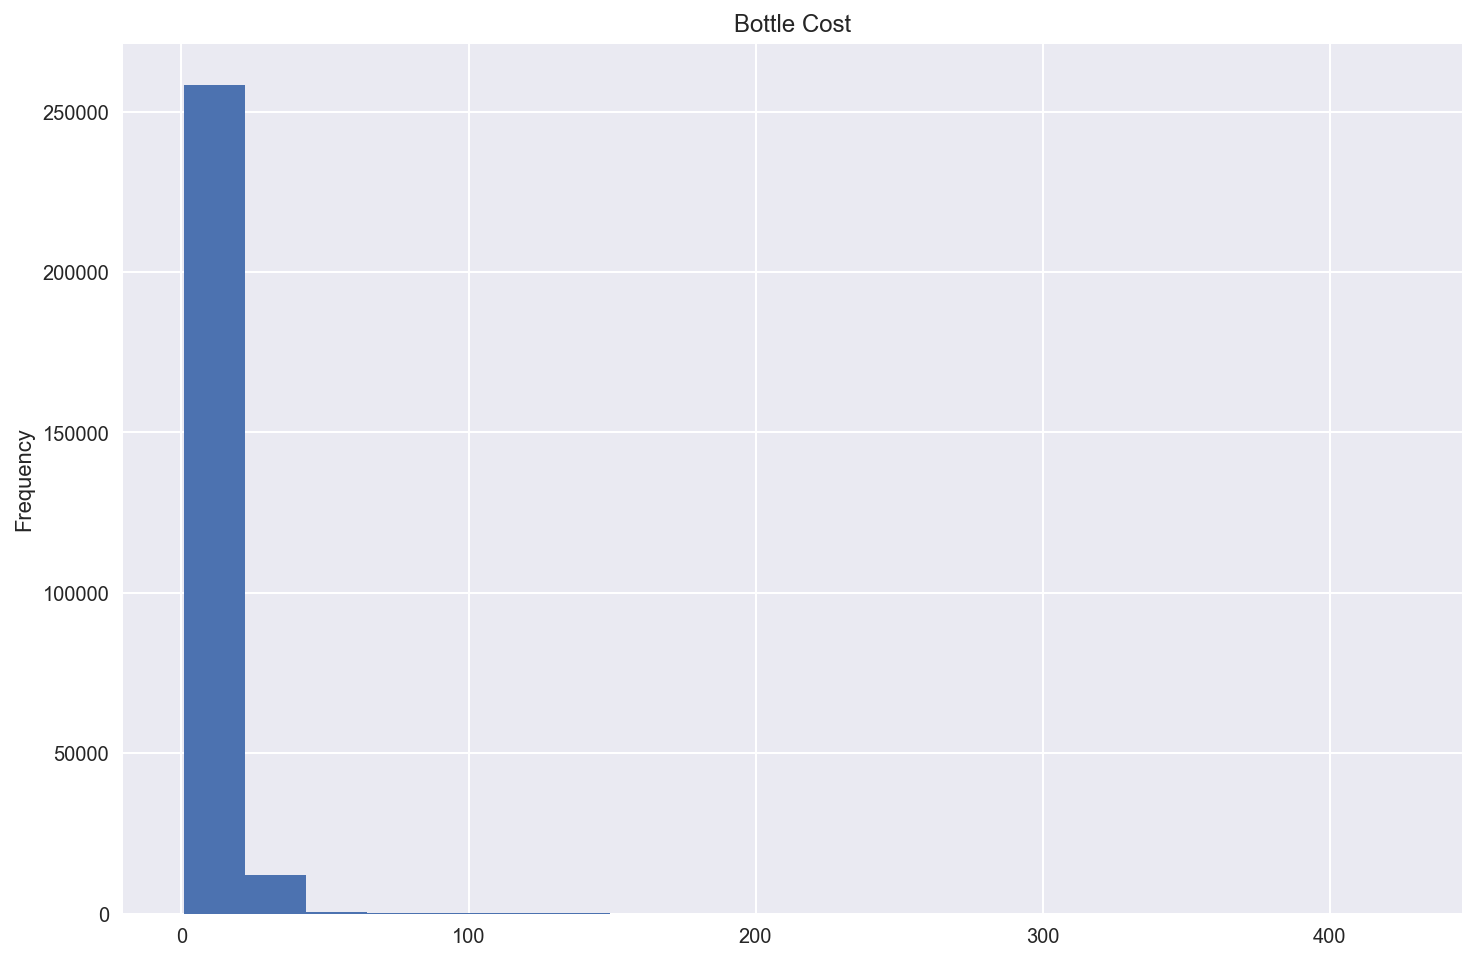

In [73]:
data.bottle_cost.plot(kind='hist', bins=20)
plt.title("Bottle Cost")

In [74]:
data[data.bottle_cost > 100].shape

(120, 25)

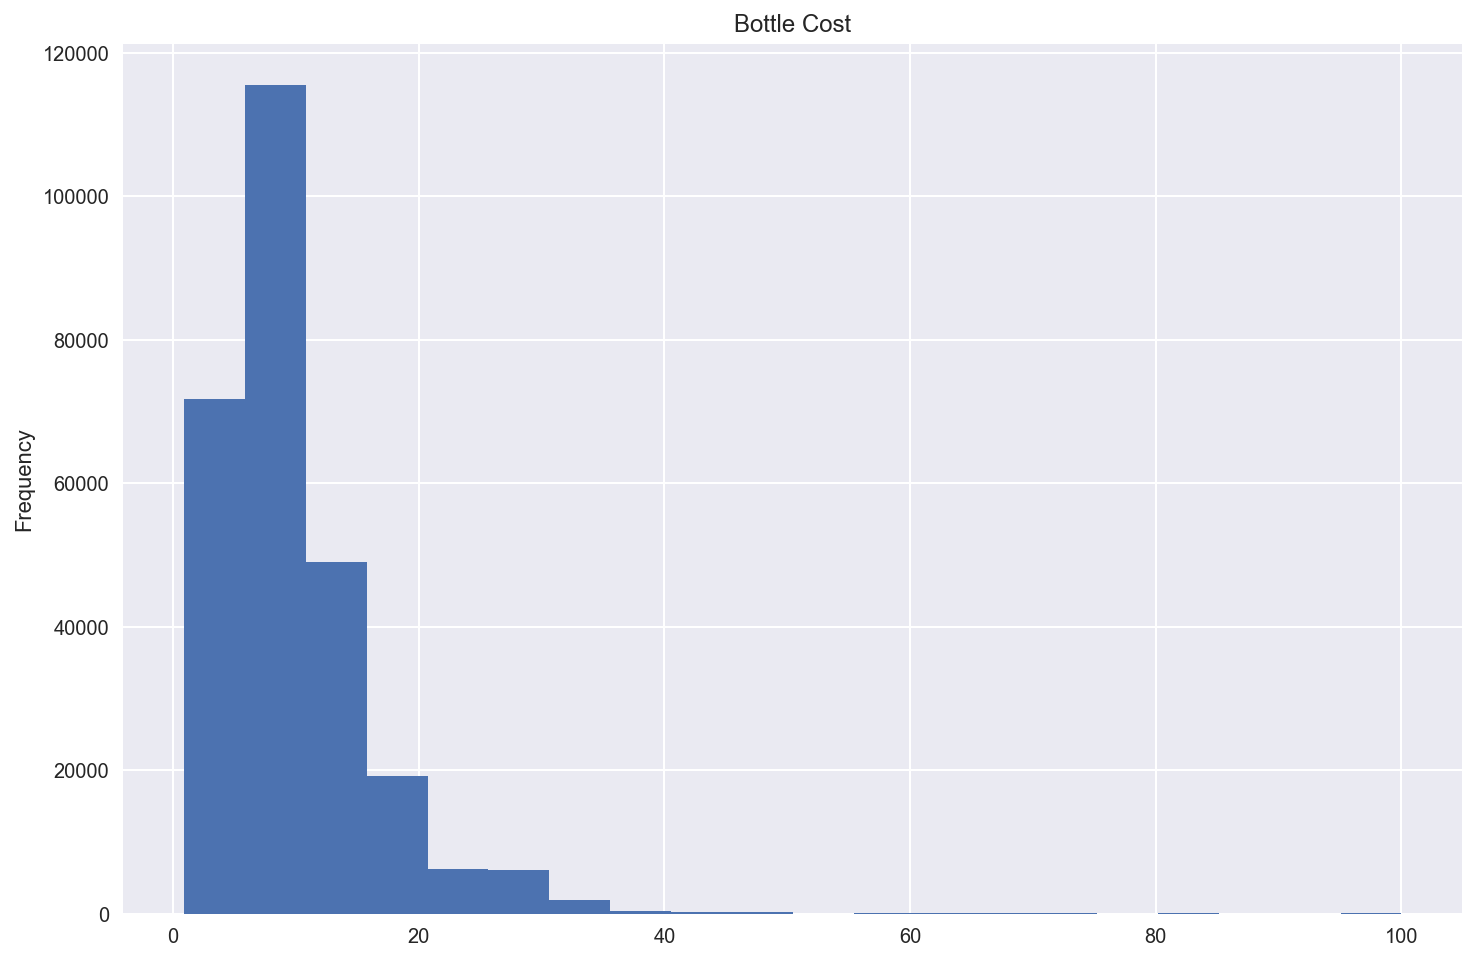

In [75]:
data[data.bottle_cost <= 100].bottle_cost.plot(kind='hist', bins = 20)
plt.title('Bottle Cost')

**Bottle Retail Histograms**

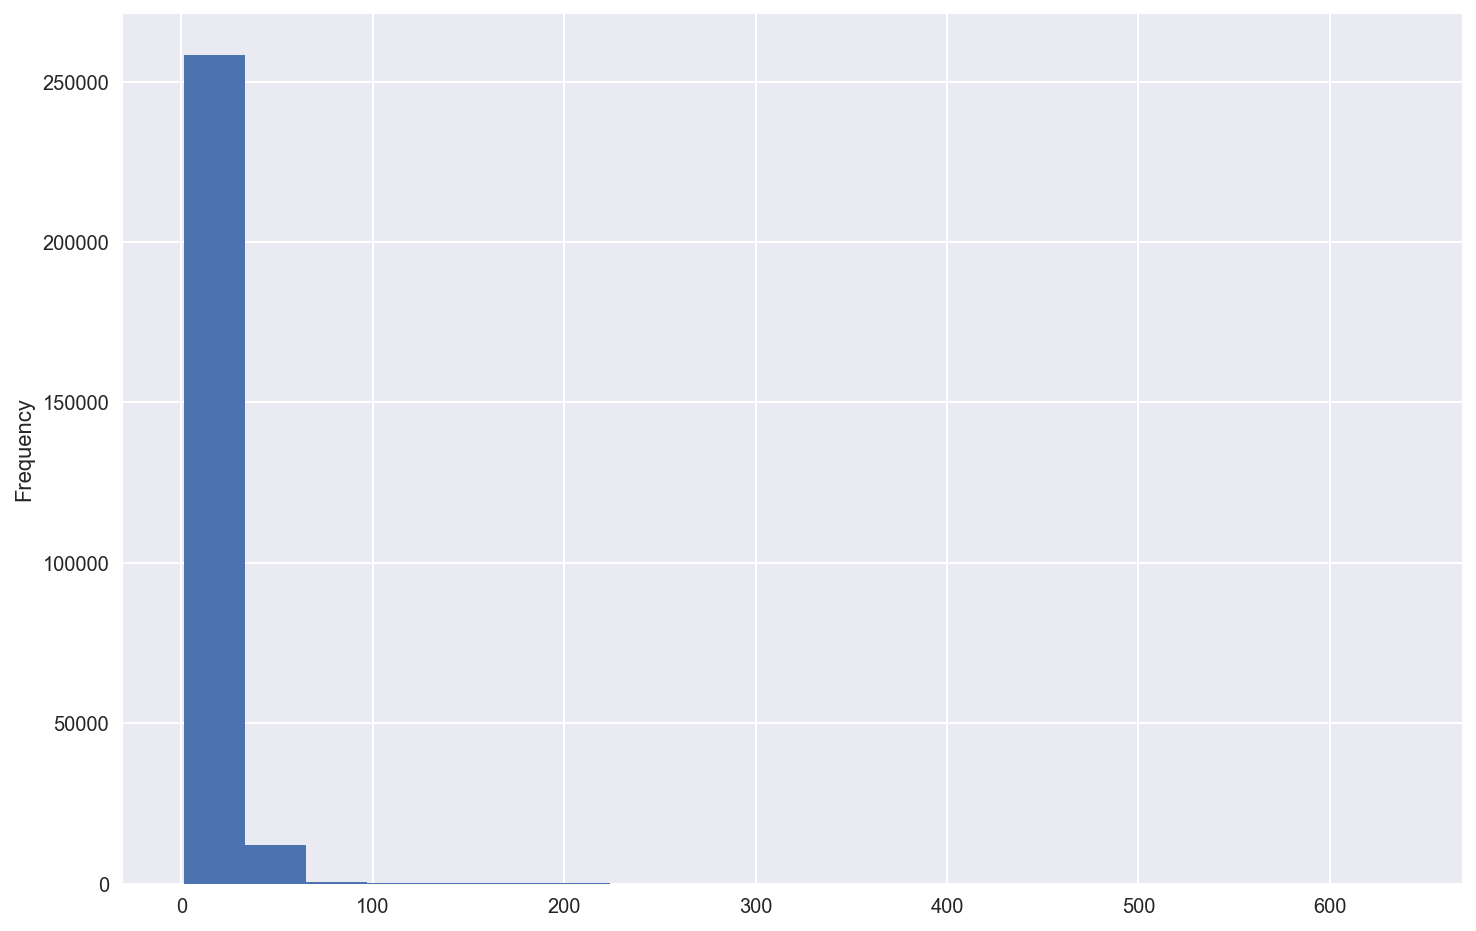

In [76]:
data.bottle_retail.plot(kind='hist', bins=20)

In [77]:
data[data.bottle_retail > 100].shape

(222, 25)

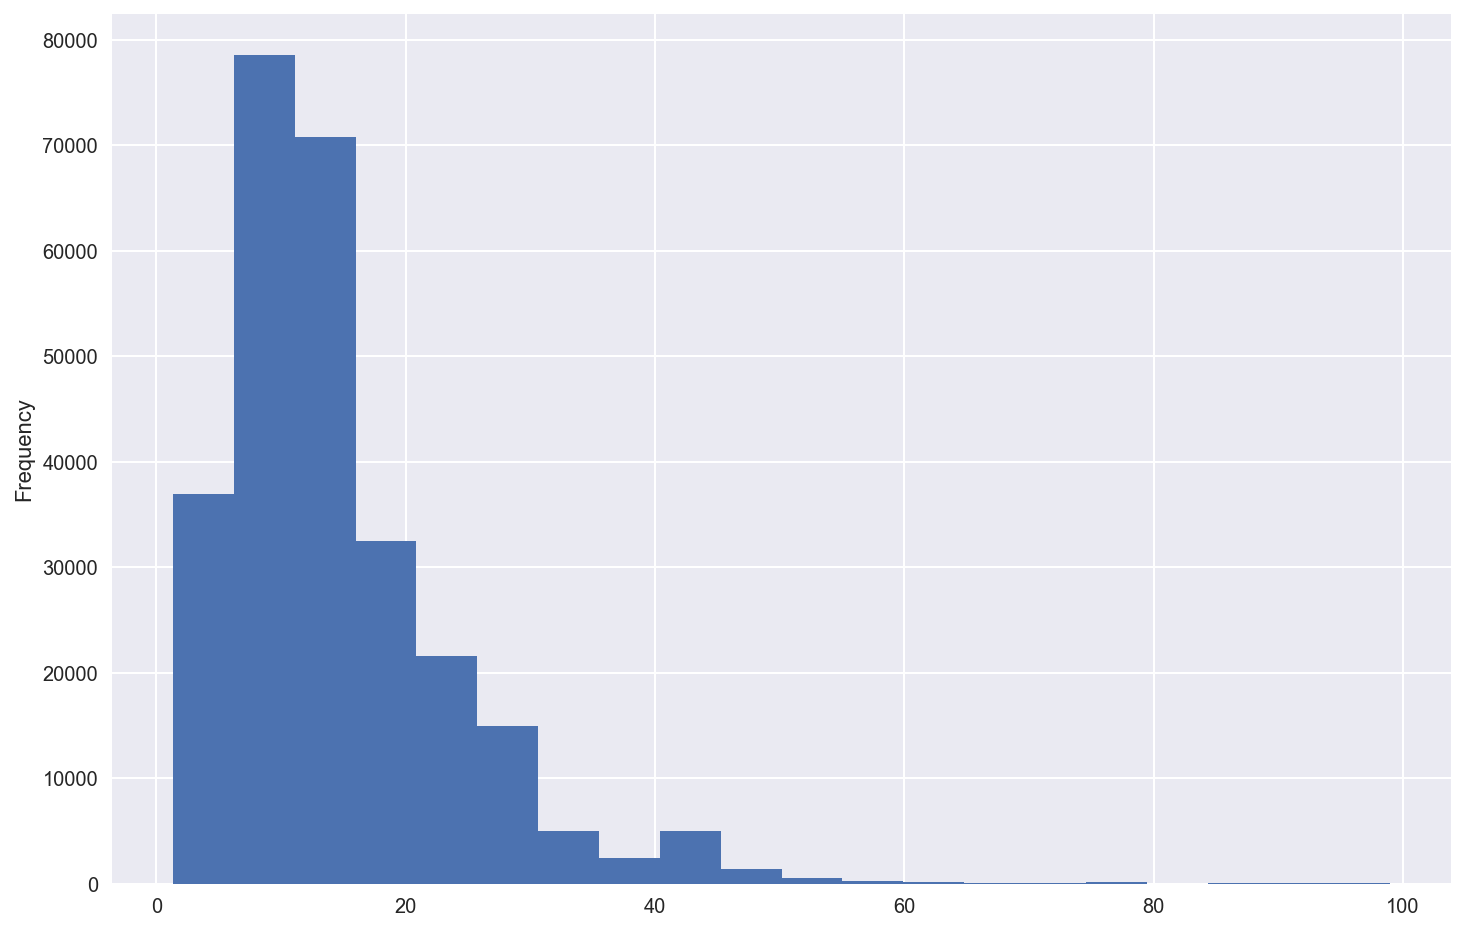

In [78]:
data[data.bottle_retail <= 100].bottle_retail.plot(kind='hist', bins=20)

**Bottles Sold Histograms**

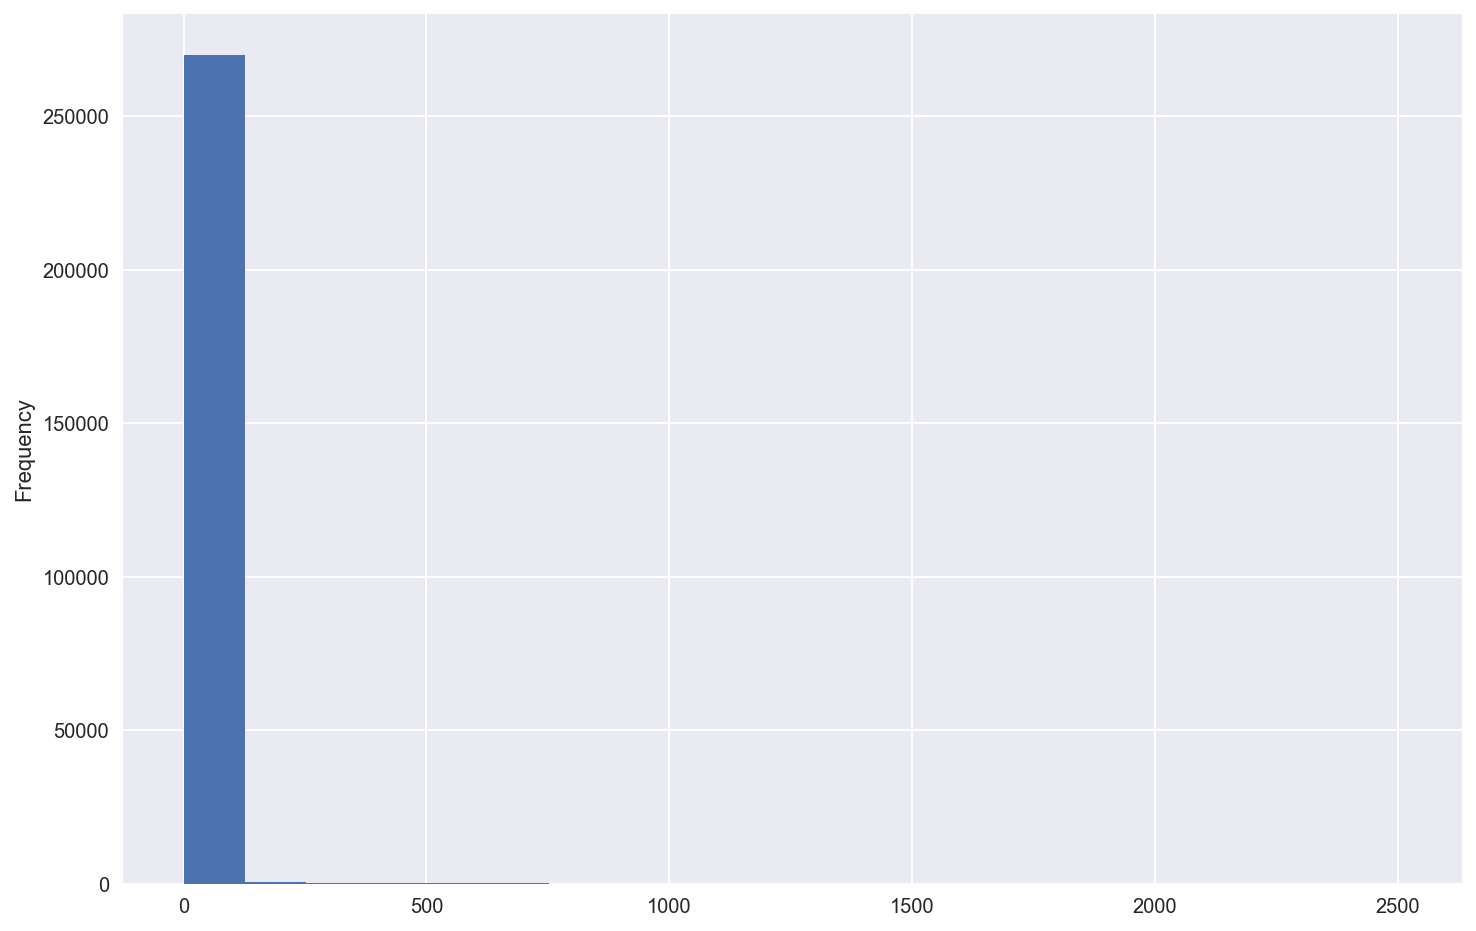

In [79]:
data.bottles_sold.plot(kind='hist', bins=20)

In [80]:
data[data.bottles_sold > 200].shape

(547, 25)

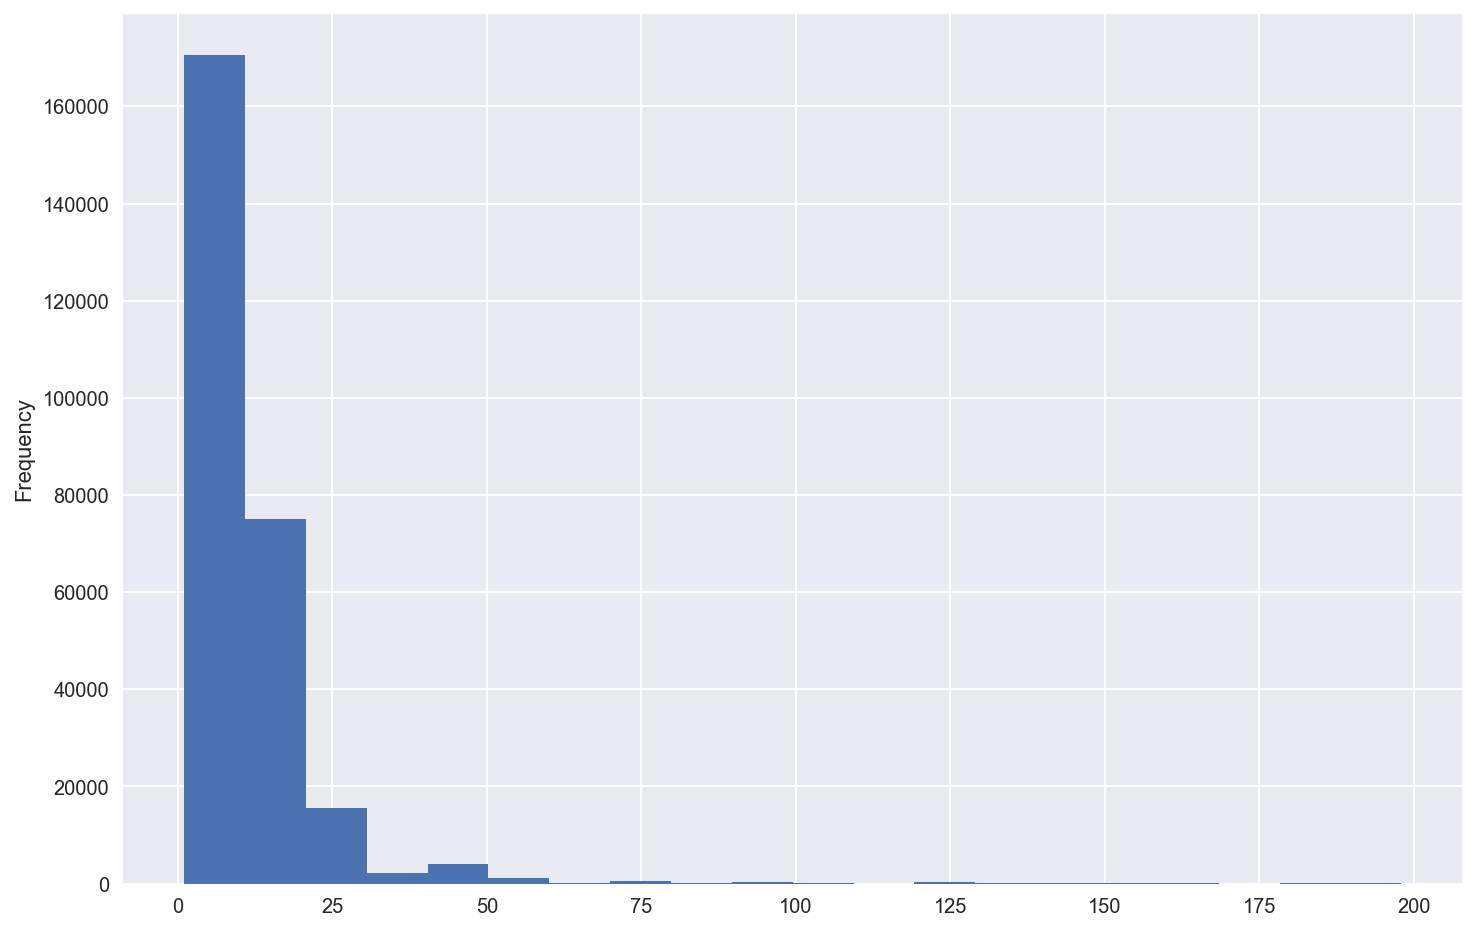

In [81]:
data[data.bottles_sold <= 200].bottles_sold.plot(kind='hist', bins=20)

**Sale Histograms**

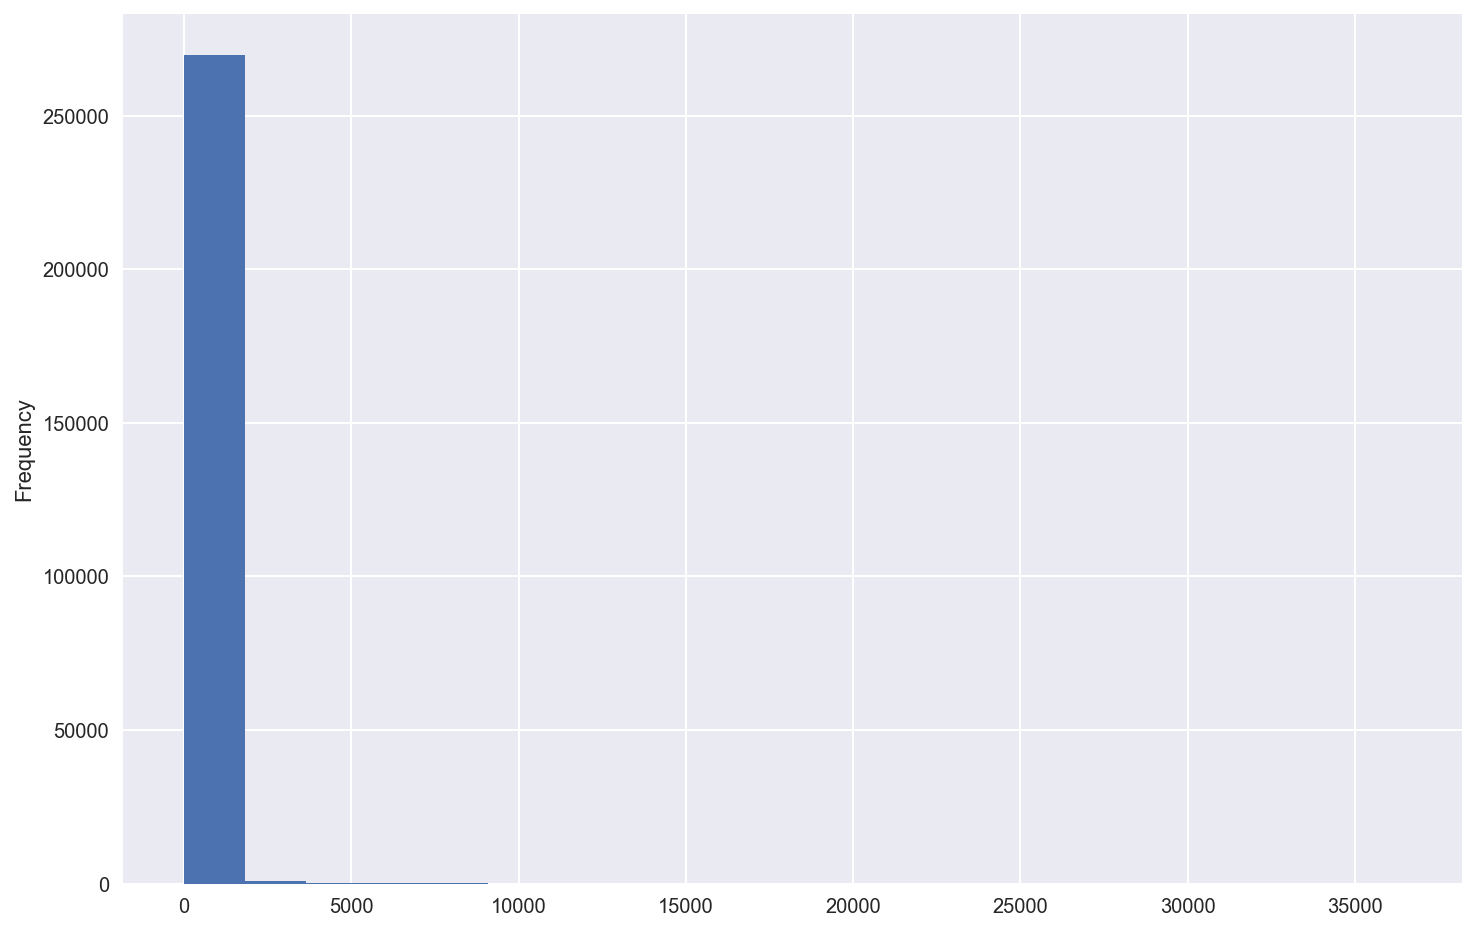

In [82]:
data.sale.plot(kind='hist', bins = 20)

In [83]:
data[data.sale > 5000].shape

(291, 25)

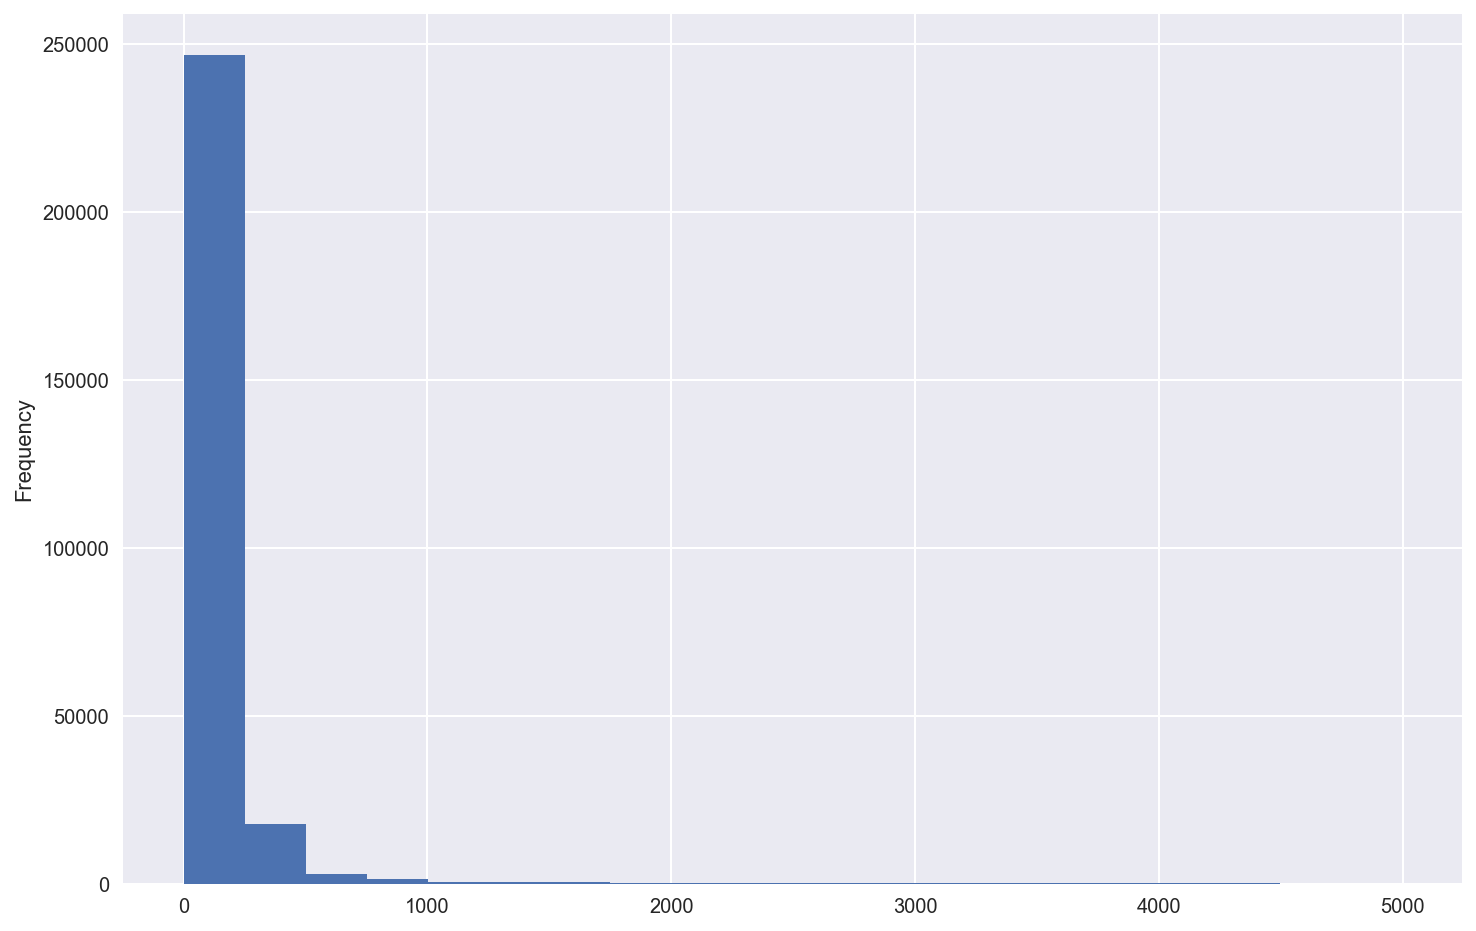

In [84]:
data[data.sale <= 5000].sale.plot(kind='hist', bins=20)

**Liters Sold Histograms**

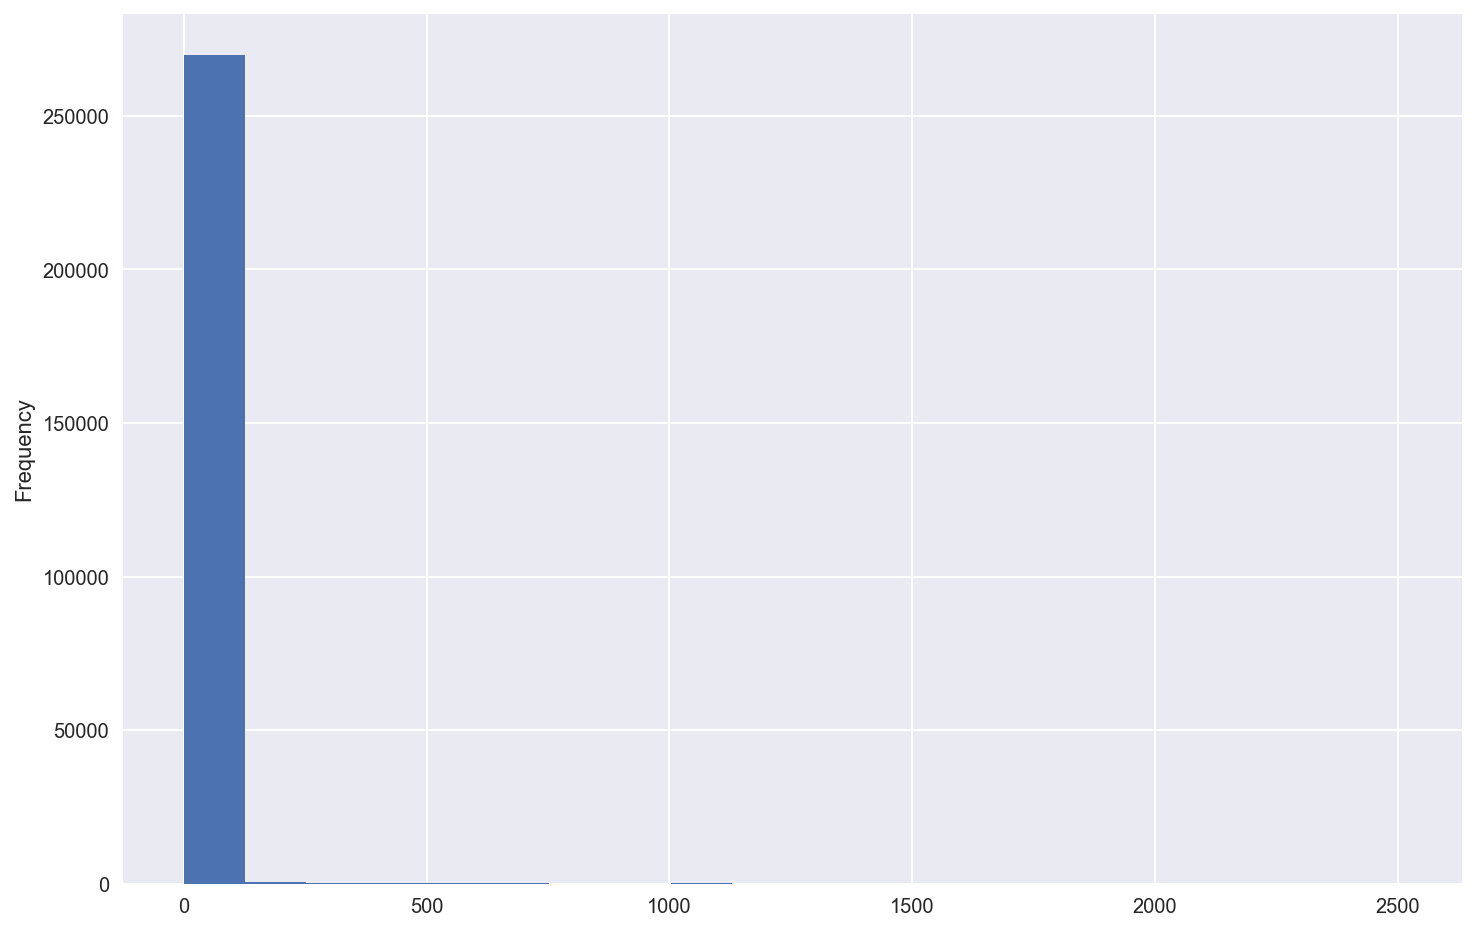

In [85]:
data.liters_sold.plot(kind='hist', bins=20)

In [86]:
data[data.liters_sold > 250].shape

(533, 25)

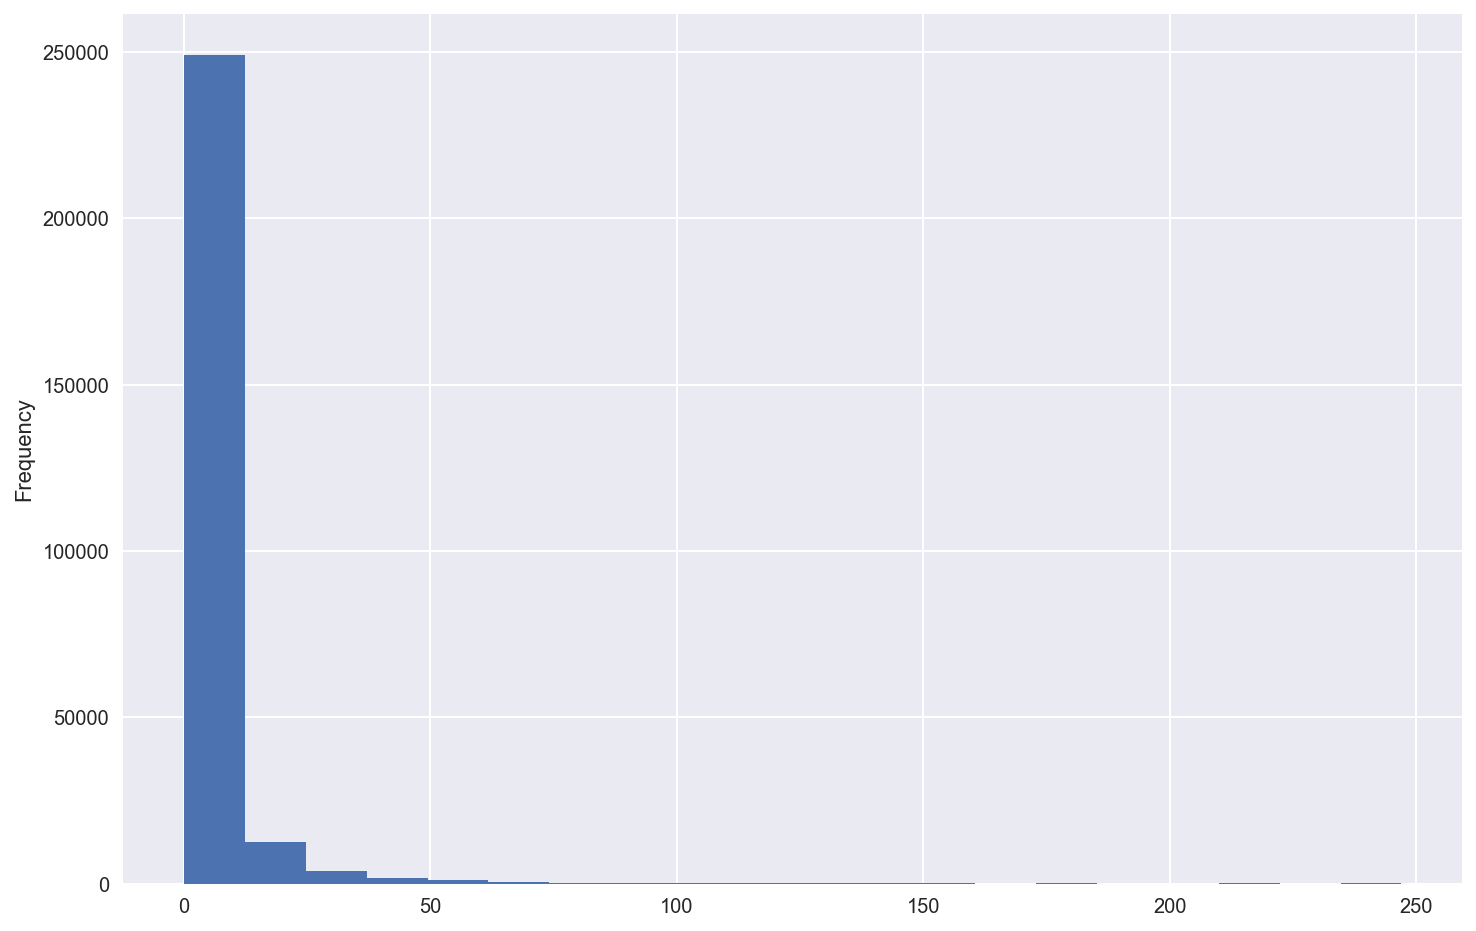

In [87]:
data[data.liters_sold <= 250].liters_sold.plot(kind='hist', bins=20)

# Mine the data

With the end goal in mind, predicting sales for the last three quarters of 2016, I look for what variables I can use to build my model. 

Understanding the relationship in sales between Q1 of 2015 and Q1 of 2016 can be beneficial to predicting Q2-Q4 sales of 2016 from the Q2-Q4 sales of 2015.

In [88]:
data.describe(include=['object', 'datetime'])

,date,store_num,city,zip,county,category,category_name,vendor_num,item_num,item,subcat
count,270920,270920,270920,270920,270920,270920.0,270920,270920,270920,270920,270920
unique,274,1400,385,414,99,84.0,72,116,2696,2173,7
top,2015-12-01 00:00:00,2633,DES MOINES,50010,Polk,1031080.0,VODKA 80 PROOF,260,36308,Black Velvet,whiskies
freq,1554,2485,23719,7090,49117,35366.0,35366,46825,2796,7232,73436
first,2015-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
data.describe()

,county_num,bottle_vol,bottle_cost,bottle_retail,bottles_sold,sale,liters_sold,gallons_sold,whiskies,tequila,vodka,gin,brandies,rum
count,269843.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000,270920.000000
mean,57.232087,924.821460,9.773185,14.675615,9.870157,128.888839,8.979525,2.372348,0.271062,0.044925,0.258567,0.036601,0.056341,0.121047
std,27.340941,493.087881,7.047075,10.570076,24.036382,382.990624,28.899832,7.634521,0.444509,0.207139,0.437848,0.187781,0.230580,0.326182
min,1.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,77.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,99.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
data.groupby('county').sale.sum().sort_values(ascending=False)[0:10]

# sum of sales for each county

county
Polk             7.788414e+06
Linn             3.165067e+06
Scott            2.532056e+06
Johnson          2.103308e+06
Black Hawk       1.936108e+06
Pottawattamie    1.280332e+06
Woodbury         1.269002e+06
Dubuque          1.089203e+06
Story            1.074964e+06
Cerro Gordo      6.983647e+05
Name: sale, dtype: float64

In [91]:
data.groupby('county').store_num.nunique().sort_values(ascending=False)[0:10]

# number of stores in each county

county
Polk             208
Linn             104
Black Hawk        73
Scott             68
Johnson           56
Pottawattamie     53
Dubuque           41
Woodbury          38
Story             38
Cerro Gordo       22
Name: store_num, dtype: int64

In [92]:
data['year'] = data.date.dt.year
# created YEAR column

In [93]:
data['month'] = data.date.dt.month
# created MONTH column

In [94]:
data[data.year == 2015].groupby('store_num').sale.sum().sort_values(ascending=False)[0:10]
# sum of sales for each store in 2015

store_num
2633    1000783.30
4829     877892.36
3385     441983.55
2512     419746.83
3420     352020.66
3952     333311.98
3814     247417.42
3354     240365.94
3773     232460.41
2670     227442.71
Name: sale, dtype: float64

In [95]:
data[(data.store_num == '2633') | (data.store_num == '4829')]

,date,store_num,city,zip,county_num,county,category,category_name,vendor_num,item_num,...,gallons_sold,whiskies,tequila,vodka,gin,brandies,rum,subcat,year,month
39,2016-03-07,2633,DES MOINES,50320,77.0,Polk,1.0112e+06,STRAIGHT BOURBON WHISKIES,461,22157,...,3.17,1,0,0,0,0,0,whiskies,2016,3
104,2015-12-30,4829,DES MOINES,50314,77.0,Polk,1.0122e+06,SCOTCH WHISKIES,35,4867,...,6.34,1,0,0,0,0,0,whiskies,2015,12
130,2016-03-14,2633,DES MOINES,50320,77.0,Polk,1.0817e+06,DISTILLED SPIRITS SPECIALTY,381,27372,...,0.20,0,0,0,0,0,0,other,2016,3
137,2015-12-17,2633,DES MOINES,50320,77.0,Polk,1.0622e+06,PUERTO RICO & VIRGIN ISLANDS RUM,55,44217,...,9.51,0,0,0,0,0,1,rum,2015,12
164,2015-09-10,2633,DES MOINES,50320,77.0,Polk,1.0312e+06,VODKA FLAVORED,380,41705,...,6.34,0,0,1,0,0,0,vodka,2015,9
223,2016-01-07,4829,DES MOINES,50314,77.0,Polk,1.08133e+06,PEACH SCHNAPPS,65,82847,...,6.34,0,0,0,0,0,0,other,2016,1
236,2015-01-15,2633,DES MOINES,50320,77.0,Polk,1.0121e+06,CANADIAN WHISKIES,65,10846,...,0.20,1,0,0,0,0,0,whiskies,2015,1
242,2015-01-27,4829,DES MOINES,50314,77.0,Polk,1.03108e+06,VODKA 80 PROOF,260,37997,...,6.34,0,0,1,0,0,0,vodka,2015,1
351,2015-03-23,2633,DES MOINES,50320,77.0,Polk,1.0817e+06,DISTILLED SPIRITS SPECIALTY,421,77487,...,63.40,0,0,0,0,0,0,other,2015,3
369,2015-05-22,2633,DES MOINES,50320,77.0,Polk,1.08139e+06,IMPORTED SCHNAPPS,421,69637,...,3.17,0,0,0,0,0,0,other,2015,5


In [96]:
data[data.city == 'DES MOINES'].store_num.nunique()

89

In [97]:
data.groupby('city').sale.sum().sort_values(ascending=False)[0:10]

city
DES MOINES         4404399.34
CEDAR RAPIDS       2511061.35
DAVENPORT          1716252.44
IOWA CITY          1254420.29
SIOUX CITY         1220094.37
WATERLOO           1216701.54
COUNCIL BLUFFS     1194632.26
WEST DES MOINES    1182603.96
AMES                981300.88
DUBUQUE             977996.31
Name: sale, dtype: float64

In [98]:
data[data.year == 2015].groupby('month').sale.sum().sort_values(ascending=False)
# sum of sales for each month in 2015

month
12    3056438.98
10    2809803.51
6     2753522.93
11    2460310.48
9     2384186.80
4     2302556.27
5     2259716.10
3     2257380.64
7     2175629.46
8     2164405.60
2     2037903.48
1     1857671.23
Name: sale, dtype: float64

In [99]:
monthly_sales = pd.DataFrame(data[data.year == 2015].groupby('month').sale.sum())

In [100]:
monthly_sales

,sale
month,
1,1857671.23
2,2037903.48
3,2257380.64
4,2302556.27
5,2259716.10
6,2753522.93
7,2175629.46
8,2164405.60
9,2384186.80


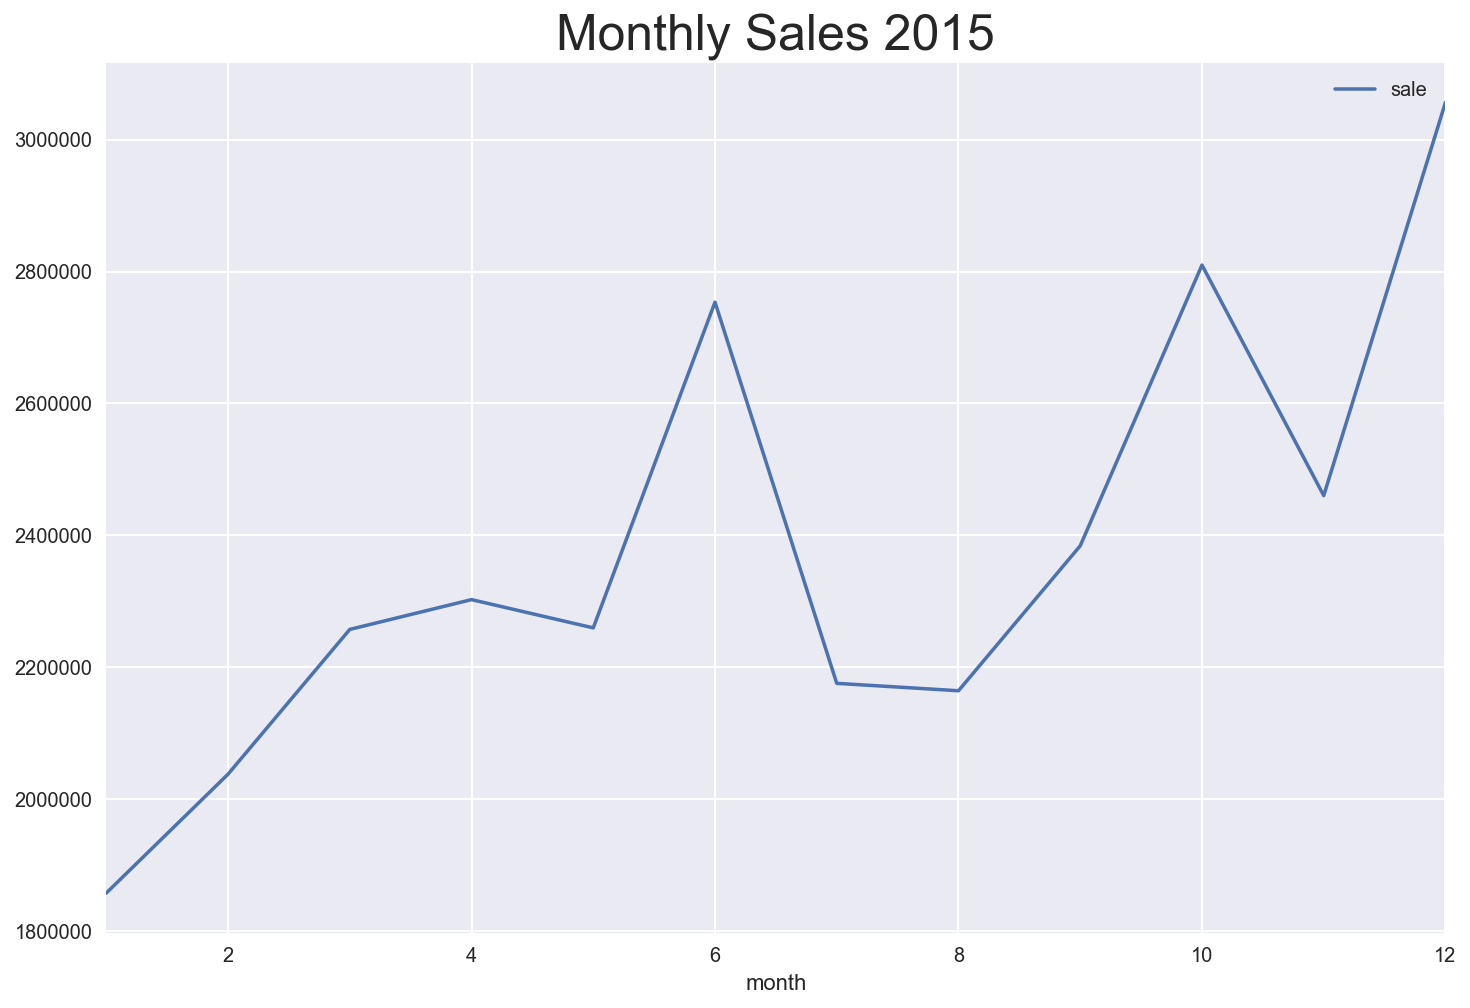

In [101]:
monthly_sales.plot()
plt.title('Monthly Sales 2015', fontsize=25)
plt.savefig('../images/2015-monthly-sales.png')

In [102]:
quarterly_sales = pd.DataFrame(index=['Q1','Q2','Q3','Q4'], columns=['sales2015'])
quarterly_sales['sales2015'] = [monthly_sales.loc[[1,2,3]].sum()[0], monthly_sales.loc[[4,5,6]].sum()[0], 
                              monthly_sales.loc[[7,8,9]].sum()[0], monthly_sales.loc[[10,11,12]].sum()[0]]

In [103]:
quarterly_sales['sales2016'] = [data[data.year == 2016].sale.sum(), 0, 0, 0]

In [104]:
quarterly_sales

,sales2015,sales2016
Q1,6152955.35,6399038.65
Q2,7315795.30,0.00
Q3,6724221.86,0.00
Q4,8326552.97,0.00


## Create new df for sales, liters sold, bottles sold by store
Broken down by year

In [105]:
stores = data.groupby('store_num').sale.sum()

In [106]:
stores = pd.DataFrame(stores)
# new dataframe with sum of sales for each store

In [107]:
stores['sales15'] = data[data.year == 2015].groupby('store_num').sale.sum()
stores['sales16'] = data[data.year == 2016].groupby('store_num').sale.sum()

# 2015 sales and 2016 sales for each store

In [108]:
def store_total(column):
    stores['total_' + column] = data.groupby('store_num')[column].sum()
    stores['2015_' + column] = data[data.year == 2015].groupby('store_num')[column].sum()
    stores['2016_' + column] = data[data.year == 2016].groupby('store_num')[column].sum()

# a function to append the column totals for each store to the stores df

In [109]:
store_total('liters_sold')
# store_total('bottles_sold')

In [110]:
stores.head()

,sale,sales15,sales16,total_liters_sold,2015_liters_sold,2016_liters_sold
store_num,,,,,,
2106,176849.97,146326.22,30523.75,11849.60,9731.85,2117.75
2113,11376.12,9310.22,2065.90,836.85,659.85,177.00
2130,139727.54,111871.43,27856.11,8448.27,6891.37,1556.90
2152,9097.51,7721.08,1376.43,773.50,633.37,140.13
2178,29912.68,24324.18,5588.50,2437.92,1917.12,520.80


In [111]:
stores.isnull().sum()

sale                  0
sales15              28
sales16              91
total_liters_sold     0
2015_liters_sold     28
2016_liters_sold     91
dtype: int64

In [112]:
stores[stores.sales15.isnull()]

,sale,sales15,sales16,total_liters_sold,2015_liters_sold,2016_liters_sold
store_num,,,,,,
5120,921.36,NaN,921.36,52.00,NaN,52.00
5130,246.40,NaN,246.40,10.50,NaN,10.50
5195,92.50,NaN,92.50,5.10,NaN,5.10
5202,407.61,NaN,407.61,23.62,NaN,23.62
5208,385.62,NaN,385.62,21.75,NaN,21.75
5210,6767.32,NaN,6767.32,450.55,NaN,450.55
5211,1210.13,NaN,1210.13,101.45,NaN,101.45
5214,1652.94,NaN,1652.94,67.30,NaN,67.30
5216,159.48,NaN,159.48,15.75,NaN,15.75


In [113]:
stores.shape

(1400, 6)

In [114]:
stores.dropna(inplace=True)

## Jan to Mar sales dataframe
2 columns: 2015 and 2016, broken down by store

In [115]:
jan_to_mar_sales = data[((data.month == 1) | (data.month == 2) | (data.month == 3))
                 ].groupby('store_num').sale.sum()
jan_to_mar_sales = pd.DataFrame(jan_to_mar_sales)

In [116]:
jan_to_mar_sales['sale15'] = data[(data.year == 2015) & ((data.month == 1) | (data.month == 2) | (data.month == 3))
                 ].groupby('store_num').sale.sum()
jan_to_mar_sales['sale16'] = data[(data.year == 2016) & ((data.month == 1) | (data.month == 2) | (data.month == 3))
                 ].groupby('store_num').sale.sum()

In [117]:
jan_to_mar_sales['liters15'] = data[(data.year == 2015) & ((data.month == 1) | (data.month == 2) | (data.month == 3))
                 ].groupby('store_num').liters_sold.sum()
jan_to_mar_sales['liters16'] = data[(data.year == 2016) & ((data.month == 1) | (data.month == 2) | (data.month == 3))
                 ].groupby('store_num').liters_sold.sum()

In [118]:
jan_to_mar_sales.head(10)

,sale,sale15,sale16,liters15,liters16
store_num,,,,,
2106,69811.04,39287.29,30523.75,2526.10,2117.75
2113,4899.15,2833.25,2065.90,177.11,177.00
2130,52128.68,24272.57,27856.11,1447.25,1556.90
2152,3379.89,2003.46,1376.43,151.74,140.13
2178,11444.91,5856.41,5588.50,409.81,520.80
2190,63765.09,29249.40,34515.69,1661.78,1517.46
2191,76423.77,29085.57,47338.20,1957.28,2928.12
2200,9075.30,4900.43,4174.87,367.72,318.78
2205,6407.74,6407.74,NaN,375.38,NaN


In [119]:
jan_to_mar_sales.isnull().sum()

sale          0
sale15      126
sale16       79
liters15    126
liters16     79
dtype: int64

In [120]:
jan_to_mar_sales.shape

(1388, 5)

In [121]:
jan_to_mar_sales[jan_to_mar_sales.sale15.isnull()]

,sale,sale15,sale16,liters15,liters16
store_num,,,,,
2853,2744.26,NaN,2744.26,NaN,212.00
2854,572.91,NaN,572.91,NaN,23.25
4295,312.82,NaN,312.82,NaN,16.71
4351,438.00,NaN,438.00,NaN,31.50
4532,221.28,NaN,221.28,NaN,18.00
4542,289.80,NaN,289.80,NaN,18.00
4688,1141.14,NaN,1141.14,NaN,75.00
4703,835.14,NaN,835.14,NaN,59.13
4716,372.84,NaN,372.84,NaN,52.50


In [122]:
jan_to_mar_sales.sale.sort_values(ascending=False)

store_num
2633    426563.87
4829    413993.06
2512    194636.61
3385    170527.29
3952    144980.23
3420    136098.18
3447    129791.62
3814    119562.60
3773    114633.73
2670     94827.21
3820     92432.68
4167     87332.14
3354     84922.62
2629     82171.03
5102     79769.40
2625     78697.01
2648     78460.73
2191     76423.77
2500     74071.09
2614     71357.29
2106     69811.04
3477     69325.86
3524     65826.24
2616     65023.31
2506     64051.20
2190     63765.09
4312     63174.38
2544     62089.45
2501     61393.49
3494     60100.02
2663     59465.30
2502     58437.43
2644     56885.37
2561     56637.24
2593     56572.08
2665     55884.37
2619     53675.65
2130     52128.68
2521     51122.46
2558     49684.08
2508     48681.45
2573     48632.81
2603     48036.31
2666     47829.55
2590     47365.85
2613     47253.86
2524     46071.93
2413     45814.19
2515     45749.63
2647     45506.36
          ...    
4689       329.88
5223       327.18
5177       325.50
5205       323.14


In [123]:
jan_to_mar_sales.sale15.sum()

6152955.3500000015

In [124]:
jan_to_mar_sales.sale16.sum()

6399038.649999977

In [125]:
stores_todrop = jan_to_mar_sales[(jan_to_mar_sales.sale15.isnull()) | (jan_to_mar_sales.sale16.isnull())
                                ].index.values

## these stores were either not open during jan-mar of 2015 or not open during jan-mar of 2016

In [126]:
len(stores_todrop)

205

In [127]:
jan_to_mar_sales.dropna(inplace=True)

# dropping null values

## Groupby store_num and subcategory
Predicting 2016 sales based off of 2015 sales

In [128]:
new_data = data
for i in stores_todrop:
    new_data = new_data[new_data.store_num != i]
    
# CREATING NEW DF THAT DOES NOT INCLUDE STORES THAT WERE CLOSED DURING JAN-MAR OF 2015 OR 2016
# THIS IS FOR MY TRAINING SET

# BENEFITS OF USING DATA FOR PREDICTIONS: stores may have opened after march of 2015 and new_data does not inlcude that
# BENEFITS OF USING NEW_DATA FOR PREDICTIONS: if stores aren't open in 2016, we don't want to predict their sales

In [129]:
new_data.shape

(258454, 27)

In [130]:
store_subcat = new_data[((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                       ].groupby(['store_num', 'subcat']).sale.sum()
store_subcat = pd.DataFrame(store_subcat)

In [131]:
store_subcat['sales15'] = new_data[(new_data.year == 2015)
                                   & ((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                  ].groupby(['store_num', 'subcat']).sale.sum()
store_subcat['sales16'] = new_data[(new_data.year == 2016)
                                   & ((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                  ].groupby(['store_num', 'subcat']).sale.sum()

In [132]:
store_subcat['liters15'] = new_data[(new_data.year == 2015)
                                   & ((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                  ].groupby(['store_num', 'subcat']).liters_sold.sum()
store_subcat['liters16'] = new_data[(new_data.year == 2016)
                                   & ((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                  ].groupby(['store_num', 'subcat']).liters_sold.sum()

In [133]:
store_subcat.isnull().sum()

# slightly better than the grouping by categories

sale          0
sales15     898
sales16     745
liters15    898
liters16    745
dtype: int64

In [134]:
store_subcat[store_subcat.sales15.isnull()]

sale  sales15  sales16  liters15  liters16
store_num subcat                                                 
2233      brandies   392.16      NaN   392.16       NaN     37.50
2238      tequila    373.68      NaN   373.68       NaN     36.00
          whiskies  2724.66      NaN  2724.66       NaN    111.00
2459      brandies    16.14      NaN    16.14       NaN      1.50
2478      tequila     31.14      NaN    31.14       NaN      0.75
2498      brandies    67.94      NaN    67.94       NaN      4.95
          other       75.84      NaN    75.84       NaN      6.75
2532      tequila    234.00      NaN   234.00       NaN     18.00
2551      gin         74.34      NaN    74.34       NaN     12.00
2554      brandies   161.28      NaN   161.28       NaN     12.00
2562      tequila    727.86      NaN   727.86       NaN     32.25
2575      tequila     33.06      NaN    33.06       NaN      1.50
2579      brandies   117.60      NaN   117.60       NaN     12.00
          gin        211.04      NaN   211.04       NaN     10.00
2592      brandies    17.76      NaN    17.76       NaN      1.50
2596      brandies    33.73      NaN    33.73       NaN      1.13
2597      brandies   475.14      NaN   475.14       NaN     48.00
2609      gin        150.00      NaN   150.00       NaN      9.50
          rum         32.31      NaN    32.31       NaN      3.50
2618      gin        276.92      NaN   276.92       NaN     20.25
2628      tequila     27.90      NaN    27.90       NaN      2.25
2650      tequila    442.38      NaN   442.38       NaN     17.25
2655      tequila    278.28      NaN   278.28       NaN      9.00
2656      tequila    124.64      NaN   124.64       NaN      4.50
2658      other      214.72      NaN   214.72       NaN     28.80
2660      gin        167.70      NaN   167.70       NaN     10.50
2667      gin         38.64      NaN    38.64       NaN      3.75
2668      tequila     75.63      NaN    75.63       NaN      3.75
2669      brandies    35.52      NaN    35.52       NaN      3.00
2806      tequila    188.88      NaN   188.88       NaN      9.00
2835      brandies    27.00      NaN    27.00       NaN      2.25
2836      gin         15.30      NaN    15.30       NaN      2.25
          tequila     42.52      NaN    42.52       NaN      1.50
2839      brandies   211.08      NaN   211.08       NaN     19.50
2840      other       89.46      NaN    89.46       NaN      6.75
2843      tequila     15.00      NaN    15.00       NaN      0.75
2844      other      278.46      NaN   278.46       NaN     11.25
2845      brandies   108.00      NaN   108.00       NaN      9.00
2846      gin         15.27      NaN    15.27       NaN      1.12
2847      rum         70.56      NaN    70.56       NaN     10.50
2850      gin         56.25      NaN    56.25       NaN      2.25
2852      tequila    283.32      NaN   283.32       NaN     13.50
          whiskies   690.23      NaN   690.23       NaN     52.75
3013      gin         16.26      NaN    16.26       NaN      2.00
3041      brandies    98.64      NaN    98.64       NaN      9.00
          gin         31.48      NaN    31.48       NaN      3.50
3056      brandies    31.98      NaN    31.98       NaN      2.25
3065      tequila     27.90      NaN    27.90       NaN      2.25
3417      gin        130.84      NaN   130.84       NaN     21.00
          tequila     36.00      NaN    36.00       NaN      3.50
...                     ...      ...      ...       ...       ...
5059      rum         24.00      NaN    24.00       NaN      3.00
5061      rum        162.00      NaN   162.00       NaN     10.50
5062      other       22.52      NaN    22.52       NaN      3.00
          rum        361.95      NaN   361.95       NaN     27.75
5064      brandies    26.64      NaN    26.64       NaN      2.25
          whiskies   188.76      NaN   188.76       NaN     13.50
5065      gin          4.95      NaN     4.95       NaN      0.50
5067      gin         19.48      NaN    19.48       NaN      1.

In [135]:
store_subcat['whiskies'] = new_data[((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                   ].groupby(['store_num', 'subcat']).whiskies.mean()
store_subcat['tequila'] = new_data[((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                   ].groupby(['store_num', 'subcat']).tequila.mean()
store_subcat['vodka'] = new_data[((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                   ].groupby(['store_num', 'subcat']).vodka.mean()
store_subcat['gin'] = new_data[((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                   ].groupby(['store_num', 'subcat']).gin.mean()
store_subcat['brandies'] = new_data[((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                   ].groupby(['store_num', 'subcat']).brandies.mean()
store_subcat['rum'] = new_data[((new_data.month == 1) | (new_data.month == 2) | (new_data.month == 3))
                                   ].groupby(['store_num', 'subcat']).rum.mean()

In [136]:
store_subcat.head(15)

sale   sales15  sales16  liters15  liters16  whiskies  \
store_num subcat                                                                
2106      brandies   1194.96    725.04   469.92     57.00     21.00         0   
          gin        1118.49    714.99   403.50     65.00     55.50         0   
          other     20808.98  12827.70  7981.28    751.50    552.00         0   
          rum       15945.84   8699.70  7246.14    630.00    433.50         0   
          tequila    2910.02   1836.00  1074.02     81.00     68.25         0   
          vodka     11582.64   5965.52  5617.12    537.25    525.00         0   
          whiskies  16250.11   8518.34  7731.77    404.35    462.50         1   
2113      brandies    142.26    142.26      NaN     14.25       NaN         0   
          gin         113.23     43.48    69.75      2.00      3.00         0   
          other       935.00    341.38   593.62     19.50     46.75         0   
          rum         590.56    312.09   278.47     18.87     19.00         0   
          tequila     445.50    364.50    81.00      6.75      1.50         0   
          vodka      1273.27    822.44   450.83     66.87     54.25         0   
          whiskies   1399.33    807.10   592.23     48.87     52.50         1   
2130      brandies   3944.94   2012.64  1932.30     56.25     88.05         0   

                    tequila  vodka  gin  brandies  rum  
store_num subcat                                        
2106      brandies        0      0    0         1    0  
          gin             0      0    1         0    0  
          other           0      0    0         0    0  
          rum             0      0    0         0    1  
          tequila         1      0    0         0    0  
          vodka           0      1    0         0    0  
          whiskies        0      0    0         0    0  
2113      brandies        0      0    0         1    0  
          gin             0      0    1         0    0  
          other           0      0    0         0    0  
          rum             0      0    0         0    1  
          tequila         1      0    0         0    0  
          vodka           0      1    0         0    0  
          whiskies        0      0    0         0    0  
2130      brandies        0      0    0         1    0

In [137]:
store_subcat.fillna(0, inplace=True)

## Groupby County

In [138]:
county_sales = data[((data.month == 1) | (data.month == 2) | (data.month == 3))
                       ].groupby(['county']).sale.sum()
county_sales = pd.DataFrame(county_sales)

In [139]:
county_sales['sale15'] = data[(data.year == 2015) & ((data.month == 1) | (data.month == 2) | (data.month == 3))
                 ].groupby('county').sale.sum()
county_sales['sale16'] = data[(data.year == 2016) & ((data.month == 1) | (data.month == 2) | (data.month == 3))
                 ].groupby('county').sale.sum()

In [140]:
county_sales['liters15'] = data[(data.year == 2015) & ((data.month == 1) | (data.month == 2) | (data.month == 3))
                 ].groupby('county').liters_sold.sum()
county_sales['liters16'] = data[(data.year == 2016) & ((data.month == 1) | (data.month == 2) | (data.month == 3))
                 ].groupby('county').liters_sold.sum()

In [141]:
county_sales.head()

,sale,sale15,sale16,liters15,liters16
county,,,,,
Adair,22056.16,10222.00,11834.16,814.54,851.87
Adams,9760.81,5324.08,4436.73,407.03,340.38
Allamakee,34014.27,14907.98,19106.29,1244.68,1578.79
Appanoose,36721.61,15228.09,21493.52,1207.15,1723.49
Audubon,8923.72,5510.75,3412.97,557.50,283.74


In [142]:
county_sales.isnull().sum()

sale        0
sale15      0
sale16      0
liters15    0
liters16    0
dtype: int64

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


- Sales fluctuates from month to month and from quarter to quarter, therefore this should be taken into account when predicting sales for the rest of 2016.
- Q1 sales increased from 2015 to 2016 so we should see our projections for the rest of the year exceed the previous years sales.
- I should build my model off of Q1 2015 information (X) and Q1 2016 information (y) based off of my assumptions above.
- There were stores that were not open during Q1 of 2015 but were open during Q1 of 2016; these stores should not be included while building my model because this is misleading information (0 earned in 2015 --> $$ earned in 2015)
- There were stores that were not open during Q1 of 2016 but were open during Q1 of 2015; these stores must've closed down and therefor should not be included while building my model because this is misleading information
- I will include the stores that were not open in Q1 of 2015 while making my projections for 2016 because they will earn a profit 

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [143]:
data.corr()

,county_num,bottle_vol,bottle_cost,bottle_retail,bottles_sold,sale,liters_sold,gallons_sold,whiskies,tequila,vodka,gin,brandies,rum,year,month
county_num,1.000000,-0.027694,0.012192,0.012118,0.019017,0.019908,0.010311,0.010320,-0.007478,0.005263,0.016200,-0.000627,-0.005392,-0.002173,0.003100,-0.001191
bottle_vol,-0.027694,1.000000,0.312826,0.313803,-0.012537,0.082404,0.156238,0.156070,0.013492,-0.071523,0.028090,0.016357,-0.138524,0.036071,-0.003278,-0.002025
bottle_cost,0.012192,0.312826,1.000000,0.999960,-0.062974,0.135955,0.009316,0.009285,0.167384,0.122524,-0.145951,-0.030825,-0.050810,-0.050107,0.000509,0.012294
bottle_retail,0.012118,0.313803,0.999960,1.000000,-0.062826,0.136139,0.009758,0.009726,0.167792,0.122430,-0.145999,-0.030847,-0.050983,-0.050271,0.000140,0.012439
bottles_sold,0.019017,-0.012537,-0.062974,-0.062826,1.000000,0.825389,0.883316,0.883346,-0.011092,-0.004659,0.038536,-0.010398,0.000997,0.003163,-0.006704,0.011312
sale,0.019908,0.082404,0.135955,0.136139,0.825389,1.000000,0.846429,0.846441,0.032443,0.015555,-0.014026,-0.018510,-0.019331,0.010259,-0.008523,0.014733
liters_sold,0.010311,0.156238,0.009316,0.009758,0.883316,0.846429,1.000000,1.000000,0.003630,-0.009860,0.031906,-0.013665,-0.033726,0.013503,-0.007455,0.008718
gallons_sold,0.010320,0.156070,0.009285,0.009726,0.883346,0.846441,1.000000,1.000000,0.003623,-0.009847,0.031911,-0.013675,-0.033707,0.013493,-0.007455,0.008720
whiskies,-0.007478,0.013492,0.167384,0.167792,-0.011092,0.032443,0.003630,0.003623,1.000000,-0.132255,-0.360113,-0.118859,-0.149003,-0.226299,0.003912,-0.001367
tequila,0.005263,-0.071523,0.122524,0.122430,-0.004659,0.015555,-0.009860,-0.009847,-0.132255,1.000000,-0.128078,-0.042274,-0.052994,-0.080485,0.000040,-0.003460


In [144]:
jan_to_mar_sales.corr()

,sale,sale15,sale16,liters15,liters16
sale,1.000000,0.987404,0.988079,0.971461,0.976816
sale15,0.987404,1.000000,0.951276,0.986850,0.938854
sale16,0.988079,0.951276,1.000000,0.933000,0.990136
liters15,0.971461,0.986850,0.933000,1.000000,0.930003
liters16,0.976816,0.938854,0.990136,0.930003,1.000000


In [145]:
county_sales.corr()

,sale,sale15,sale16,liters15,liters16
sale,1.000000,0.999576,0.999606,0.998321,0.999080
sale15,0.999576,1.000000,0.998366,0.999195,0.998002
sale16,0.999606,0.998366,1.000000,0.996678,0.999317
liters15,0.998321,0.999195,0.996678,1.000000,0.996948
liters16,0.999080,0.998002,0.999317,0.996948,1.000000


In [146]:
store_subcat.corr()

,sale,sales15,sales16,liters15,liters16,whiskies,tequila,vodka,gin,brandies,rum
sale,1.000000,0.951897,0.956047,0.914837,0.913931,0.149362,-0.071264,0.064494,-0.094938,-0.086228,-0.030216
sales15,0.951897,1.000000,0.820213,0.950334,0.776906,0.152780,-0.067921,0.052343,-0.090855,-0.084655,-0.024078
sales16,0.956047,0.820213,1.000000,0.798550,0.962814,0.132652,-0.068051,0.070318,-0.090303,-0.079974,-0.033370
liters15,0.914837,0.950334,0.798550,1.000000,0.792096,0.127075,-0.093314,0.122185,-0.094805,-0.103843,-0.022699
liters16,0.913931,0.776906,0.962814,0.792096,1.000000,0.102021,-0.087414,0.129962,-0.091308,-0.098200,-0.030929
whiskies,0.149362,0.152780,0.132652,0.127075,0.102021,1.000000,-0.162302,-0.202897,-0.153685,-0.168746,-0.198348
tequila,-0.071264,-0.067921,-0.068051,-0.093314,-0.087414,-0.162302,1.000000,-0.161464,-0.122302,-0.134288,-0.157844
vodka,0.064494,0.052343,0.070318,0.122185,0.129962,-0.202897,-0.161464,1.000000,-0.152891,-0.167875,-0.197324
gin,-0.094938,-0.090855,-0.090303,-0.094805,-0.091308,-0.153685,-0.122302,-0.152891,1.000000,-0.127158,-0.149464
brandies,-0.086228,-0.084655,-0.079974,-0.103843,-0.098200,-0.168746,-0.134288,-0.167875,-0.127158,1.000000,-0.164112


### By Store

In [147]:
from scipy.stats import pearsonr

(0.95127565303777284, 0.0)


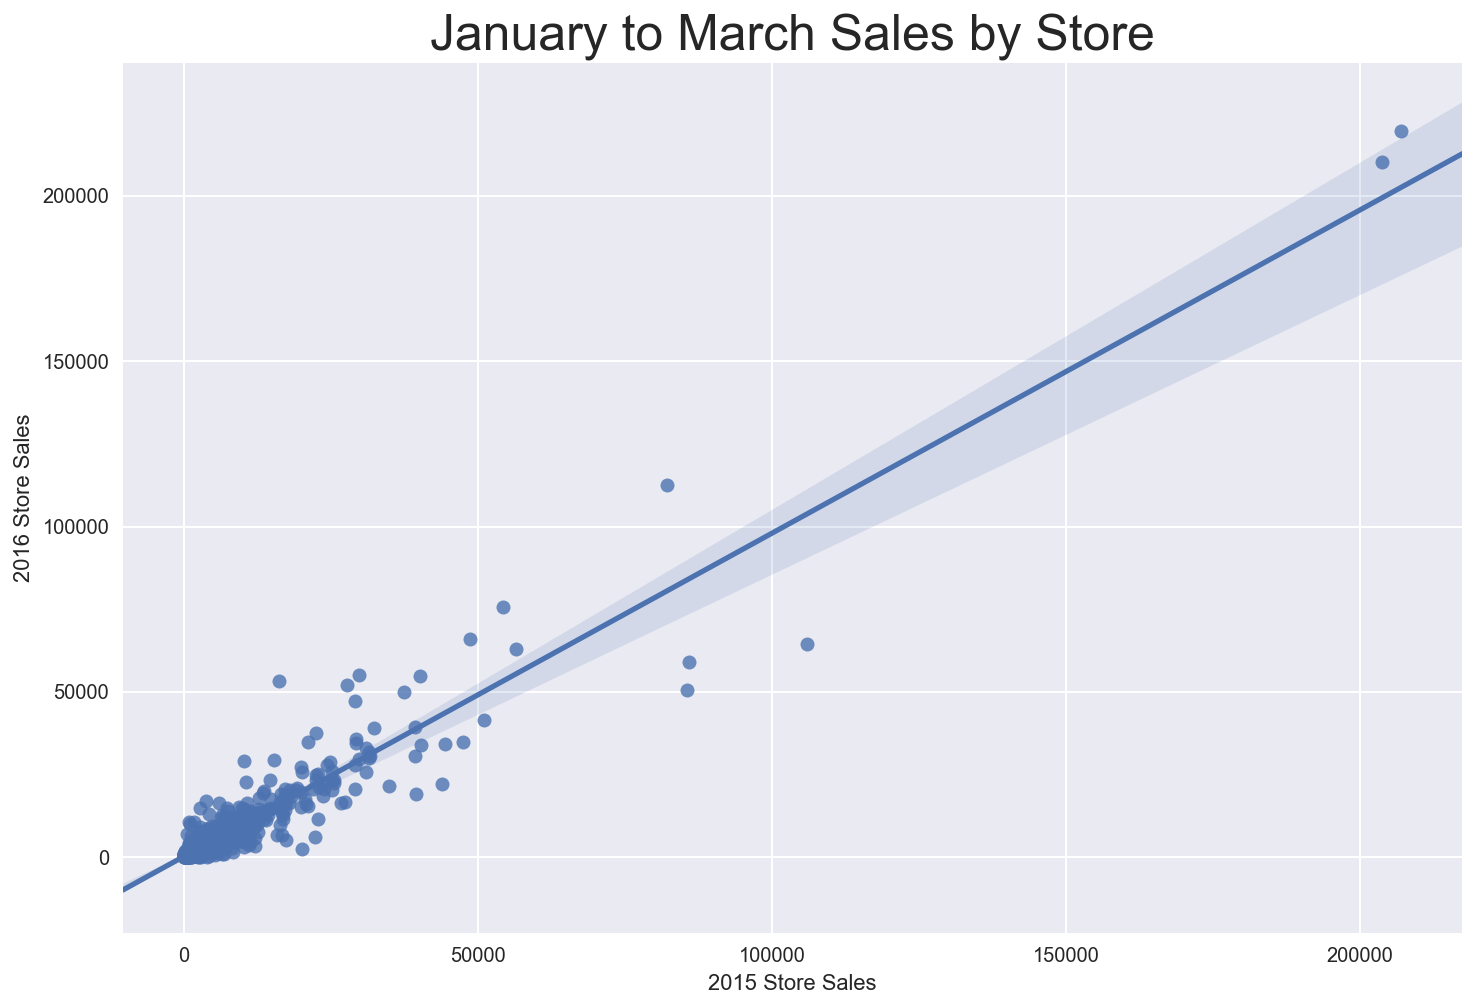

In [148]:
sns.regplot(x = 'sale15', y = 'sale16', data = jan_to_mar_sales)
plt.title('January to March Sales by Store', fontsize=25)
plt.xlabel('2015 Store Sales')
plt.ylabel('2016 Store Sales')
plt.savefig('../images/15-16-store-sales-corr.png')
print pearsonr(jan_to_mar_sales.sale15, jan_to_mar_sales.sale16)

(0.93299997678744051, 0.0)


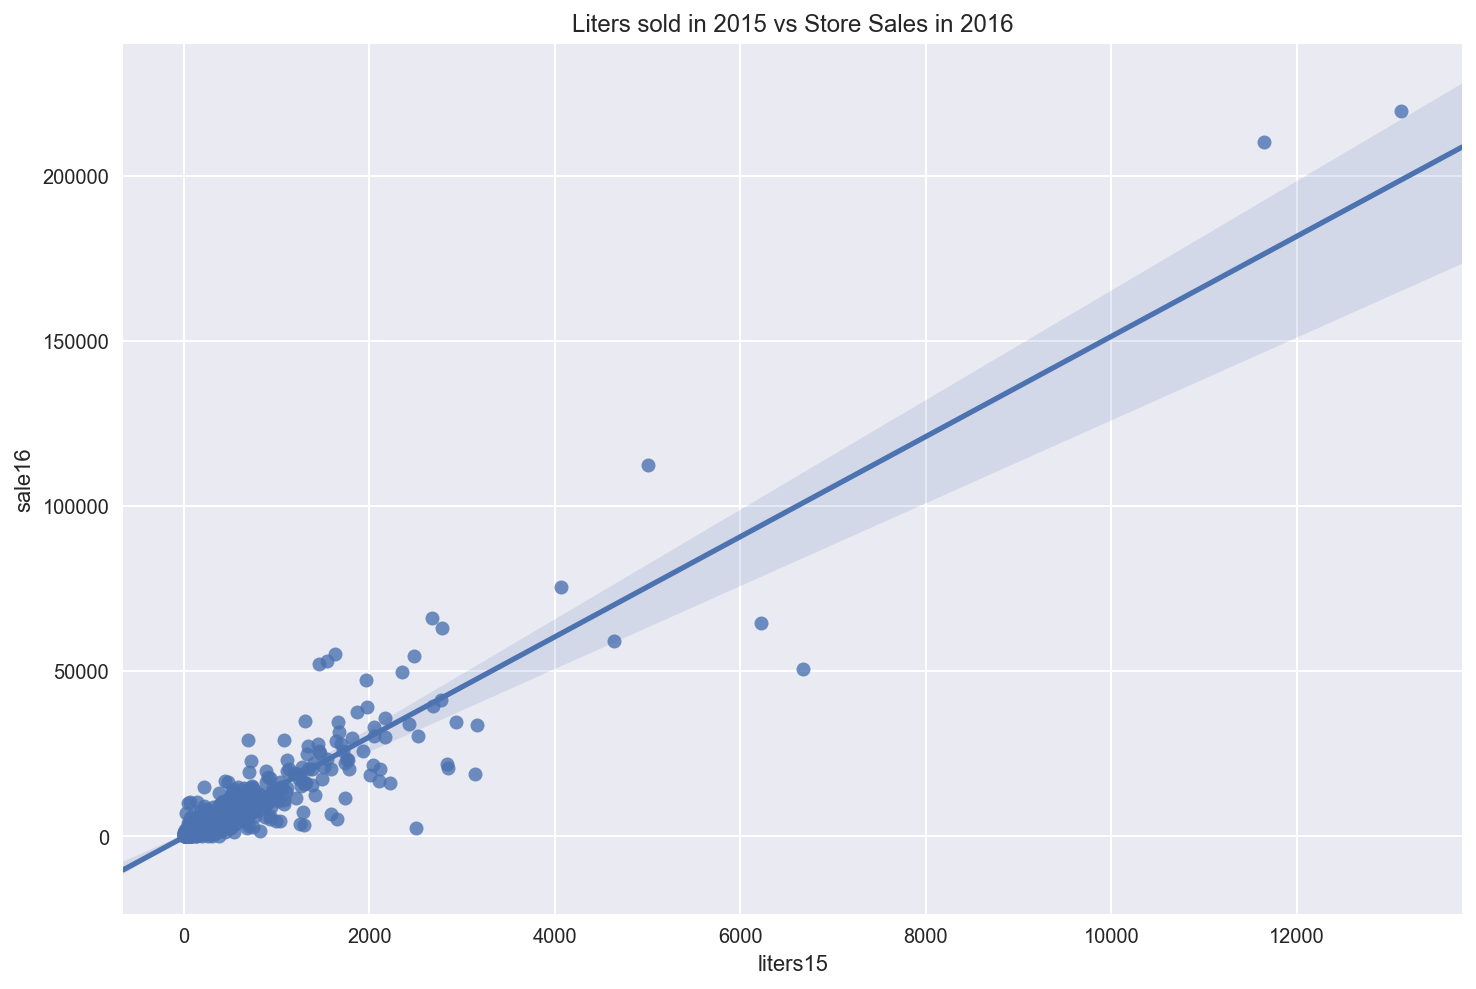

In [149]:
sns.regplot(x = 'liters15', y = 'sale16', data = jan_to_mar_sales)
plt.title('Liters sold in 2015 vs Store Sales in 2016', )
print pearsonr(jan_to_mar_sales.liters15, jan_to_mar_sales.sale16)

### By County

(0.9983658786046441, 2.1635050240310045e-122)


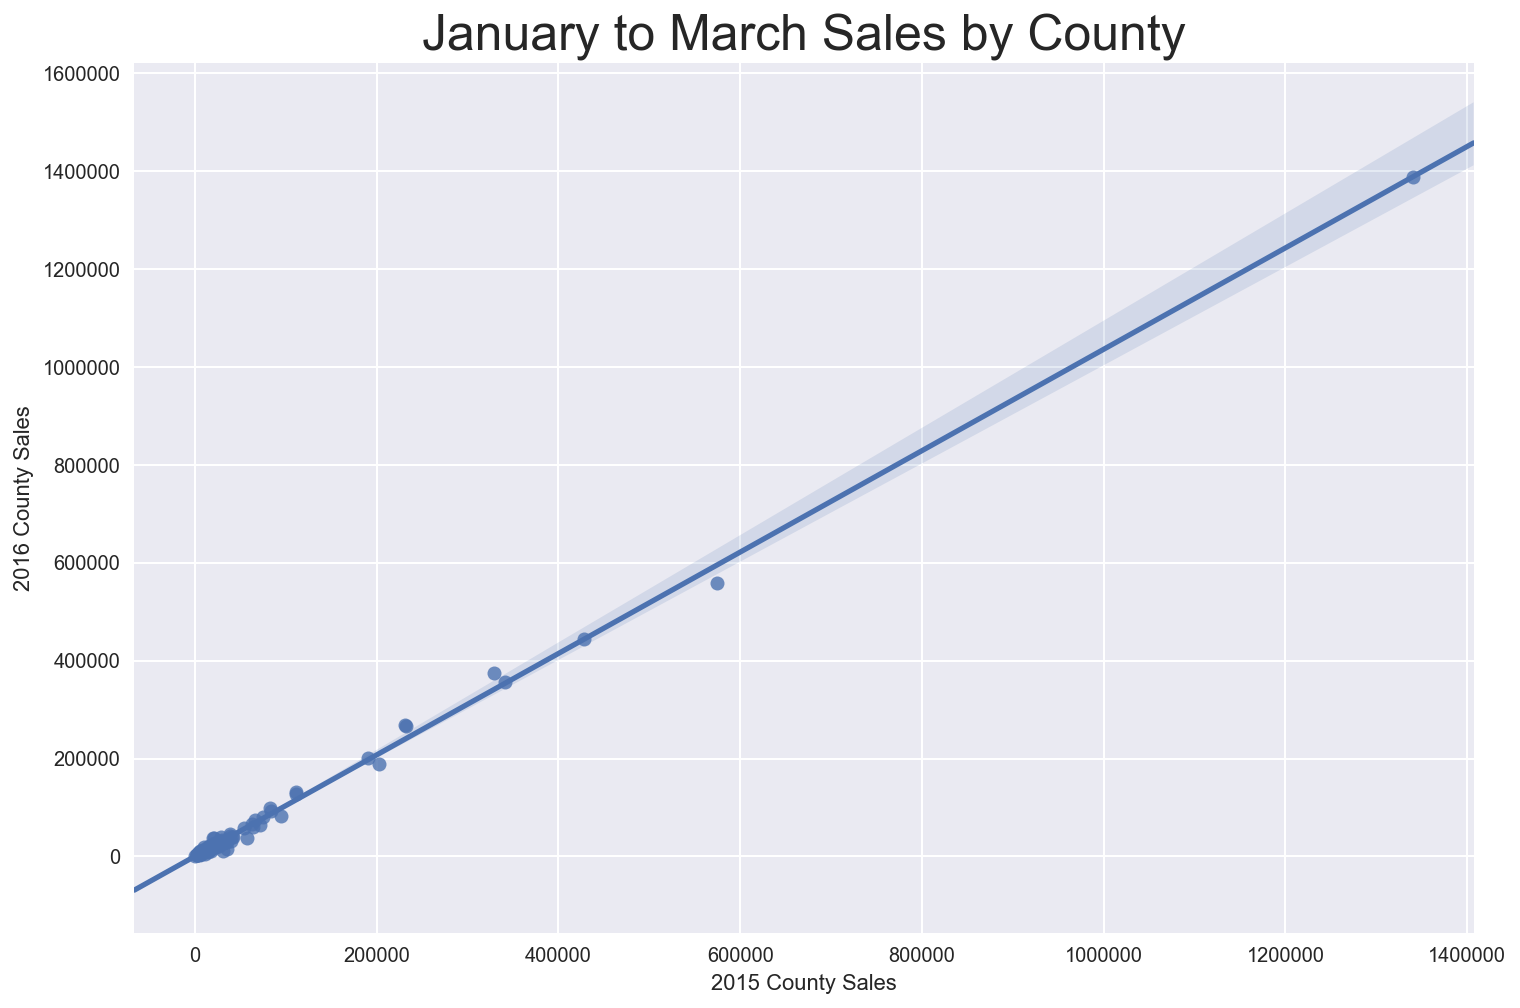

In [150]:
sns.regplot(x = 'sale15', y = 'sale16', data = county_sales)
plt.title('January to March Sales by County', fontsize=25)
plt.xlabel('2015 County Sales')
plt.ylabel('2016 County Sales')
plt.savefig('../images/15-16-county-sales-corr.png')
print pearsonr(county_sales.sale15, county_sales.sale16)

(0.99667765450381829, 1.8359435114322239e-107)


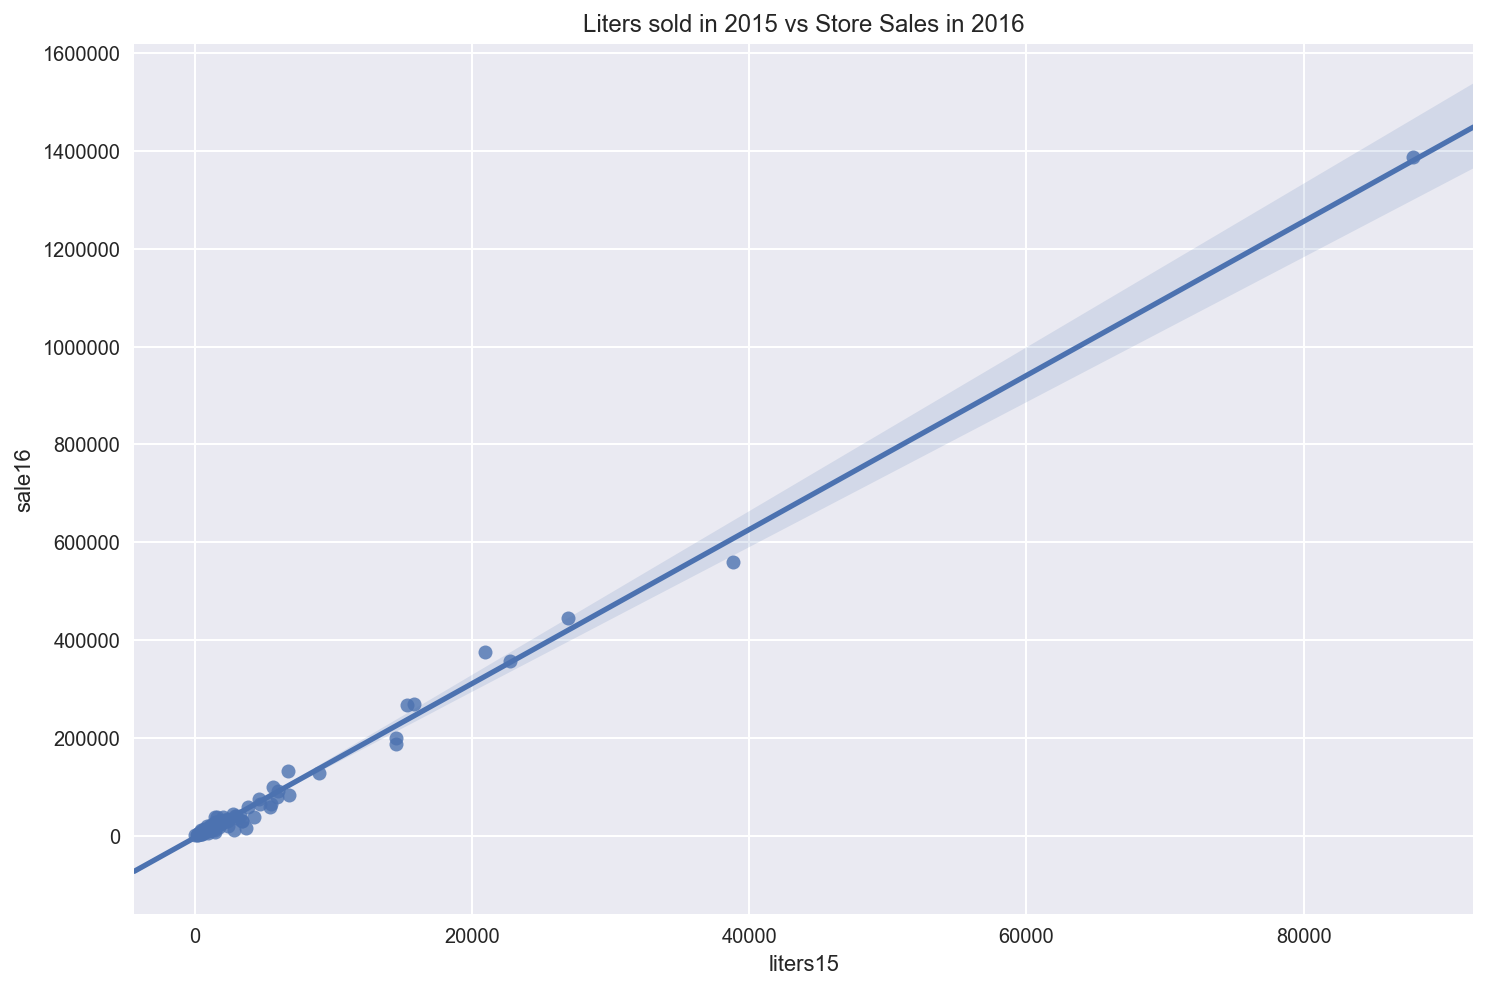

In [151]:
sns.regplot(x = 'liters15', y = 'sale16', data = county_sales)
plt.title('Liters sold in 2015 vs Store Sales in 2016')
print pearsonr(county_sales.liters15, county_sales.sale16)

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [152]:
from pandas.core import datetools

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  """Entry point for launching an IPython kernel.


In [153]:
import statsmodels.api as sm
import patsy
from sklearn.model_selection import train_test_split
from sklearn import linear_model

## Predicting Store Sales Model

In [154]:
X = jan_to_mar_sales[['sale15']]
y = jan_to_mar_sales['sale16']

In [155]:
len(X)

1183

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=66)

In [157]:
# sklearn

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [158]:
print "Score:", model.score(X_test, y_test)

Score: 0.904821889989


In [159]:
model.coef_

array([ 1.02424144])

#### Cross Validation

In [160]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [161]:
scores = cross_val_score(model, X, y, cv=10)
print "Cross-validated scores:", scores

Cross-validated scores: [ 0.79992624  0.88418665  0.91264302  0.74175847  0.42744603  0.67013692
  0.30930537  0.57134074  0.98789081  0.67685913]


In [162]:
sum(scores)/10

0.69814933905696175

Cross-Predicted Accuracy: 0.90254298068


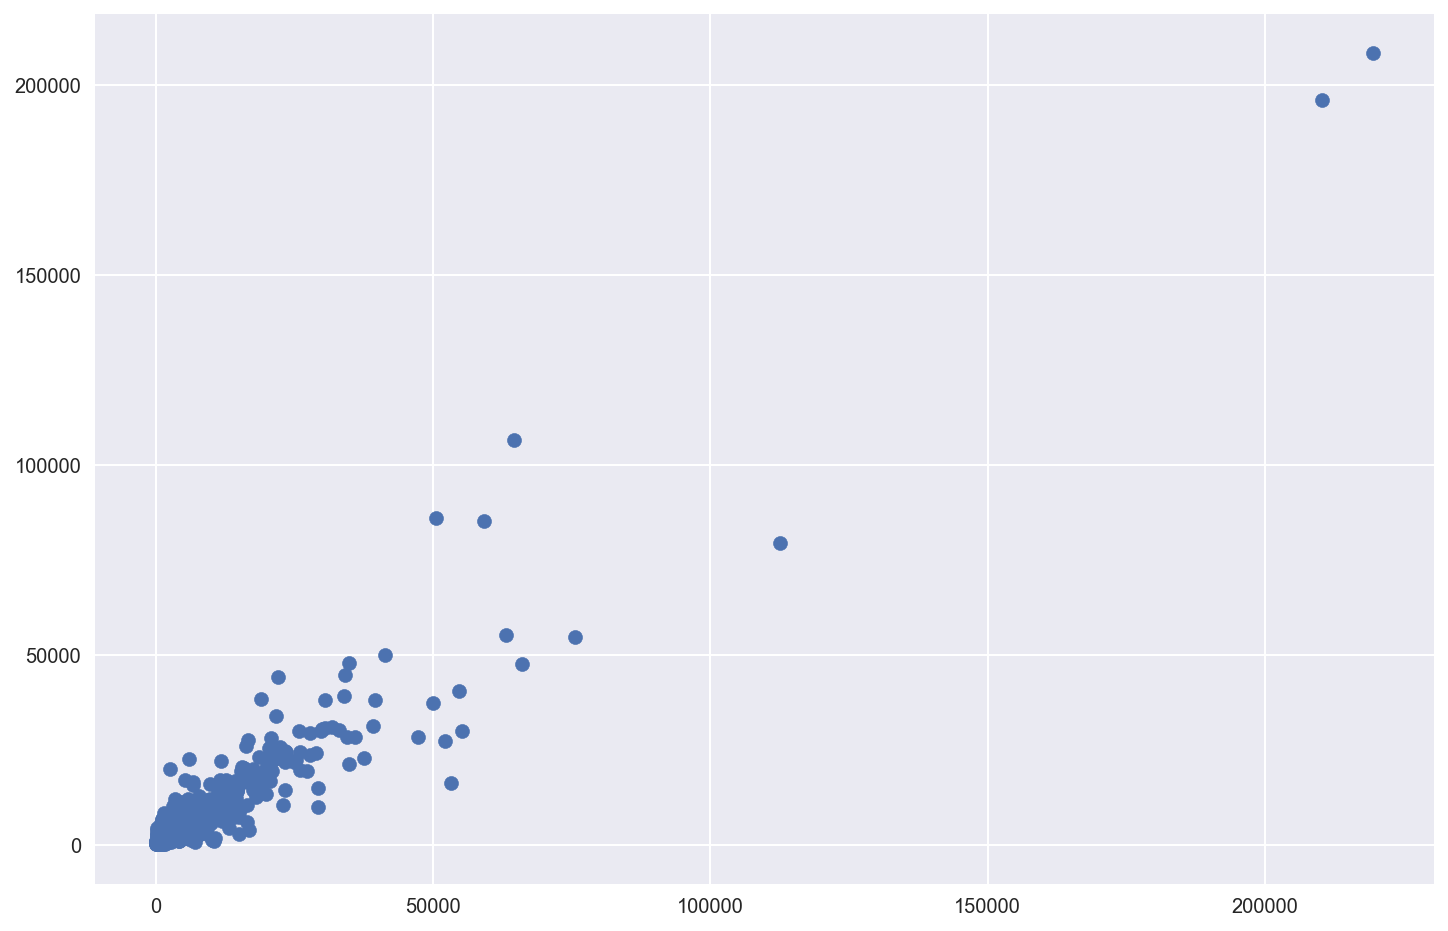

In [163]:
cv_predictions = cross_val_predict(model, X, y, cv=10)
plt.scatter(y, cv_predictions)
accuracy = metrics.r2_score(y, cv_predictions)
print "Cross-Predicted Accuracy:", accuracy

### Regularization

In [164]:
from sklearn.linear_model import RidgeCV

In [165]:
ridgeregcv = RidgeCV(alphas=[0, .001, .01, .1, 1, 10], cv=10)
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

10

In [166]:
ridgeregcv.score(X_test, y_test)

0.90482189001436186

In [167]:
# The purpose of the Ridge regression method to reduce the variance of the estimates by constraining 
# the size of the coefficients
# since the coefficient of our regression equation is already pretty small (~ 1), alpha can take on a large value
# without affecting our coefficient at all, therefore neither models performs better than the other

# the non-regularized model will be used to predict our sales

## Predicting County Sales Model

In [168]:
X2 = county_sales[['sale15']]
y2 = county_sales['sale16']

In [169]:
len(X2)

99

In [170]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.7, random_state=66)

In [171]:
# sklearn

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train2, y_train2)

In [172]:
print "Score:", model2.score(X_test2, y_test2)

Score: 0.995715198989


In [173]:
model2.coef_

array([ 1.03566601])

#### Cross Validation

In [174]:
scores2 = cross_val_score(model2, X2, y2, cv=10)
print "Cross-validated scores:", scores2

Cross-validated scores: [ 0.9978492   0.92951291  0.94110443  0.99047977  0.53378496  0.99165158
  0.88991249  0.99943075  0.99610046  0.98183563]


In [175]:
sum(scores2) / 10

0.92516621780867614

Cross-Predicted Accuracy: 0.996613278694


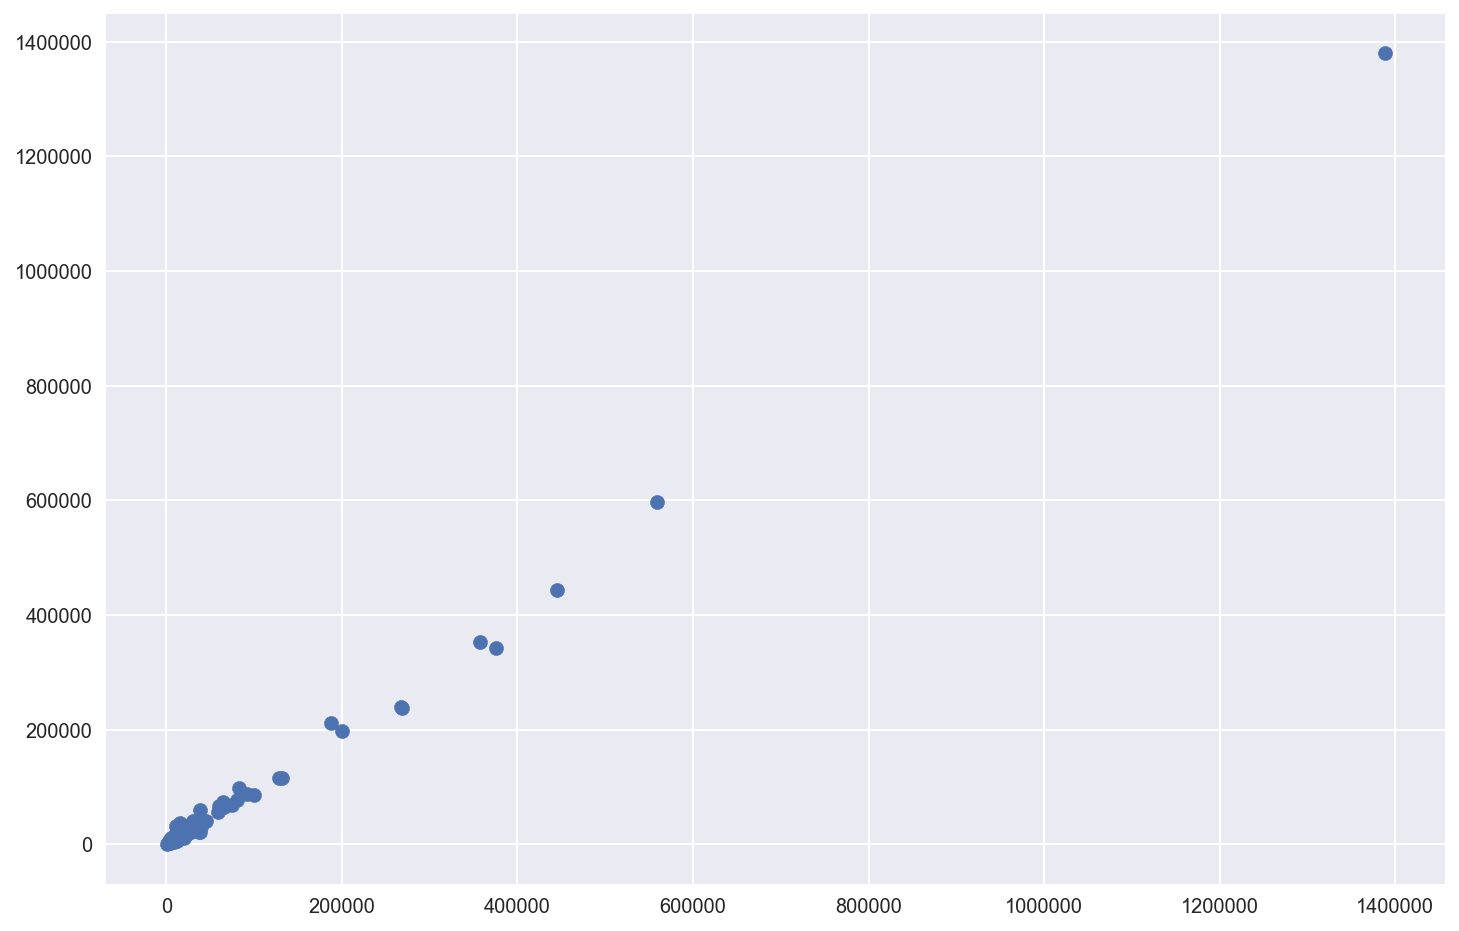

In [176]:
cv_predictions2 = cross_val_predict(model2, X2, y2, cv=10)
plt.scatter(y2, cv_predictions2)
accuracy2 = metrics.r2_score(y2, cv_predictions2)
print "Cross-Predicted Accuracy:", accuracy2

### Regularization

In [177]:
ridgeregcv2 = RidgeCV(alphas=[0, .001, .01, .1, 1, 10], cv=10)
ridgeregcv2.fit(X_train2, y_train2)
ridgeregcv2.alpha_

10

In [178]:
ridgeregcv2.score(X_test2, y_test2)

0.9957151989890124

In [179]:
# The purpose of the Ridge regression method to reduce the variance of the estimates by constraining 
# the size of the coefficients
# since the coefficient of our regression equation is already pretty small (~ 1), alpha can take on a large value
# without affecting our coefficient at all, therefore neither models performs better than the other

# the non-regularized model will be used to predict our sales

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [180]:
predictions = model.predict(X_test)

Score: 0.904821889989


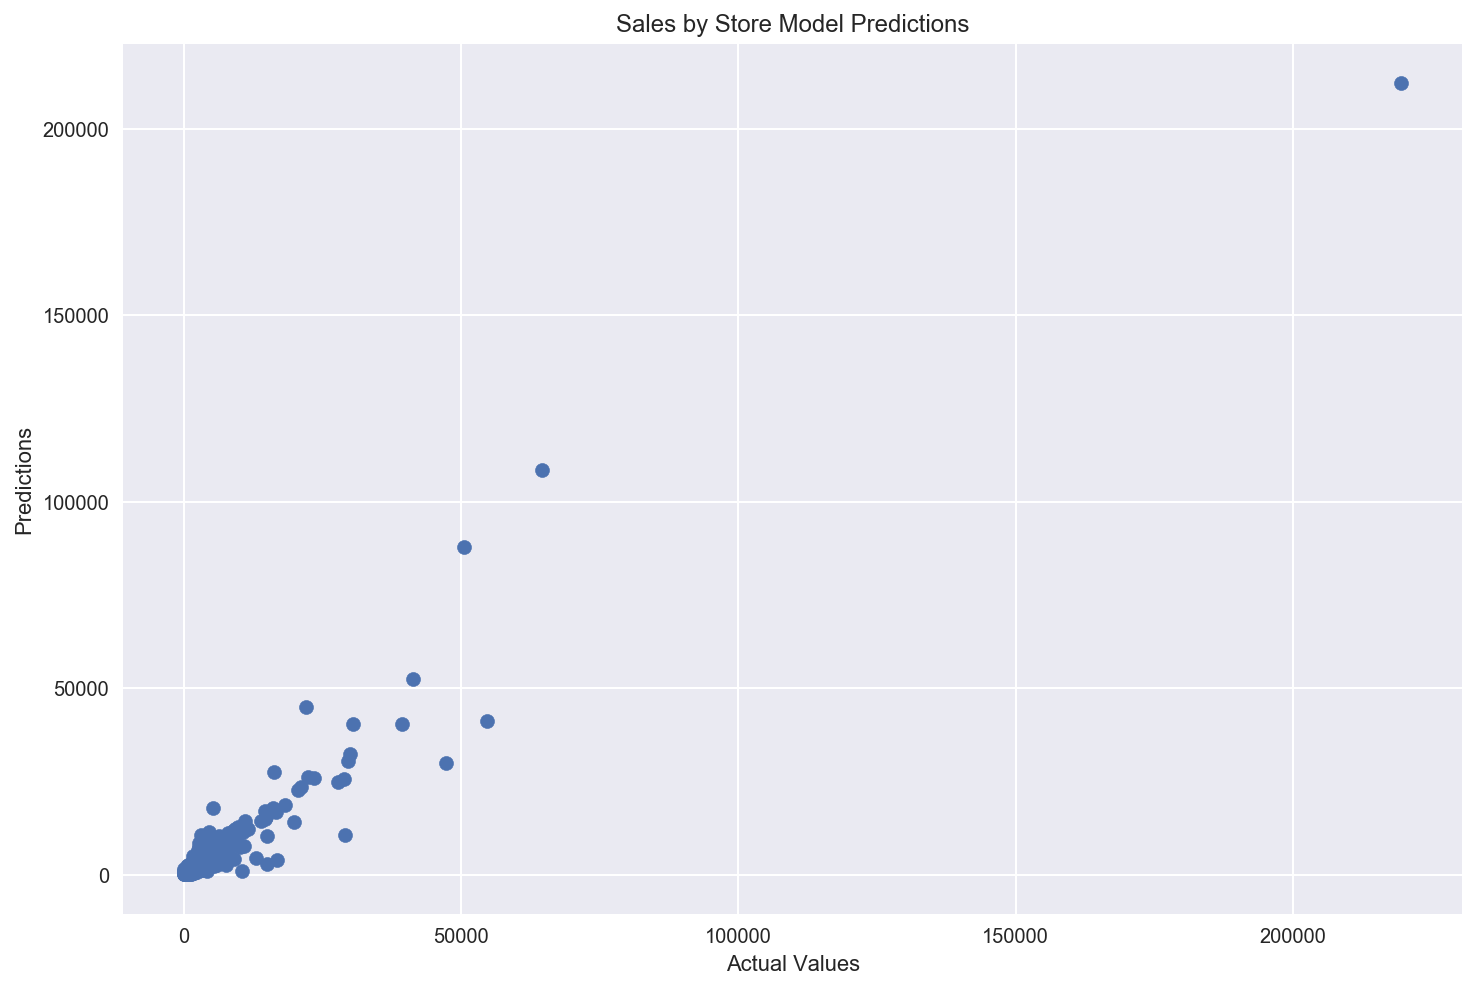

In [181]:
print "Score:", model.score(X_test, y_test)
plt.scatter(y_test, predictions)
plt.title('Sales by Store Model Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
# plt.savefig('../images/store-model-pred.png')

In [182]:
predictions2 = model2.predict(X_test2)

Score: 0.995715198989


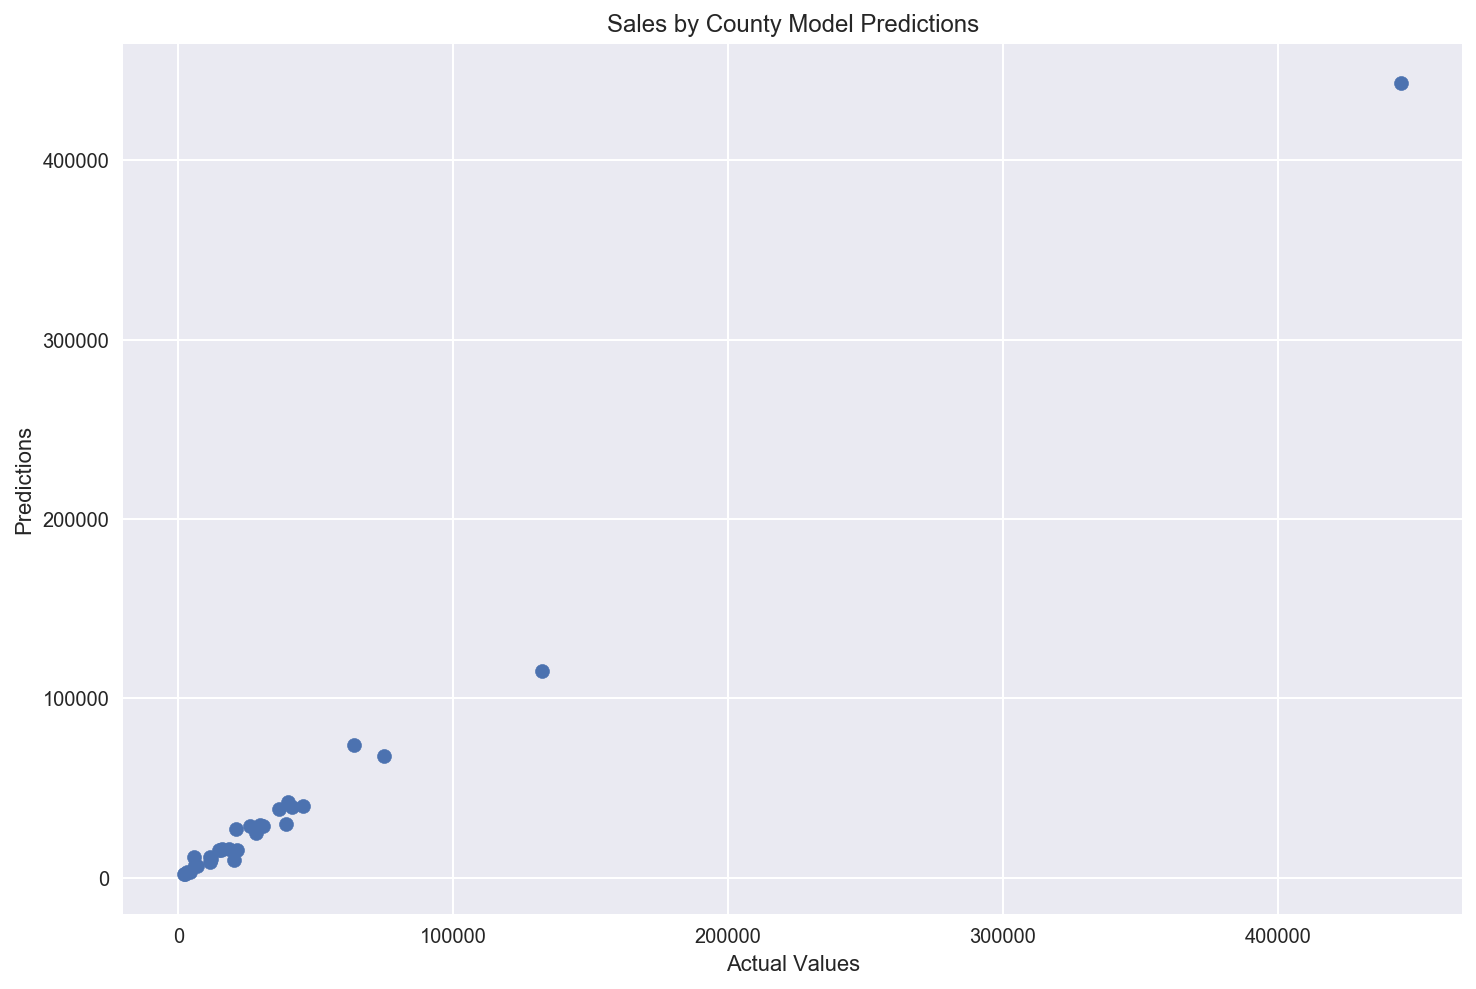

In [183]:
print "Score:", model2.score(X_test2, y_test2)
plt.scatter(y_test2, predictions2)
plt.title('Sales by County Model Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.savefig('../images/county-model-pred.png')

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

## Projecting Store Sales for Rest of Year

In [184]:
total_15_sales = data[data.year == 2015].sale.sum()

In [185]:
q1_16_sales = data[data.year == 2016].sale.sum()

In [186]:
last3q_15_store_sales = data[(data.month == 4) | (data.month == 5) | (data.month == 6) | (data.month == 7) |
                            (data.month == 8) | (data.month == 9) | (data.month == 10) | (data.month == 11) |
                            (data.month == 12)].groupby('store_num').sale.sum()
last3q_15_store_sales = pd.DataFrame(last3q_15_store_sales)

In [187]:
last3q_15_store_sales.isnull().sum()

sale    0
dtype: int64

In [188]:
proj_store_sales = model.predict(last3q_15_store_sales[['sale']])

In [189]:
print "Total Sales for last 3 quarters of 2015:", last3q_15_store_sales.sale.sum()
print "Projected Sales for last 3 quarters of 2016:", sum(proj_store_sales)

Total Sales for last 3 quarters of 2015: 22366570.13
Projected Sales for last 3 quarters of 2016: 23080105.1819


In [190]:
proj_2016_sales = q1_16_sales + sum(proj_store_sales)

In [191]:
print "Total 2015 sales:", total_15_sales
print "Projected 2016 sales:", proj_2016_sales

Total 2015 sales: 28519525.48
Projected 2016 sales: 29479143.8319


In [192]:
per_change = (proj_2016_sales - total_15_sales) / total_15_sales
print "Projected percent change in sales from 2015 to 2016:", per_change * 100

Projected percent change in sales from 2015 to 2016: 3.36477671268


## Projecting County Sales for Rest of Year

In [193]:
last3q_15_county_sales = data[(data.month == 4) | (data.month == 5) | (data.month == 6) | (data.month == 7) |
                             (data.month == 8) | (data.month == 9) | (data.month == 10) | (data.month == 11) |
                             (data.month == 12)].groupby('county').sale.sum()
last3q_15_county_sales = pd.DataFrame(last3q_15_county_sales)

In [194]:
last3q_15_county_sales.isnull().sum()

sale    0
dtype: int64

In [195]:
proj_county_sales = model2.predict(last3q_15_county_sales[['sale']])

In [196]:
print "Total Sales for last 3 quarters of 2015:", last3q_15_county_sales.sale.sum()
print "Projected Sales for last 3 quarters of 2016:", sum(proj_county_sales)

Total Sales for last 3 quarters of 2015: 22366570.13
Projected Sales for last 3 quarters of 2016: 23151782.5886


In [197]:
proj_16_sales = q1_16_sales + sum(proj_county_sales)

In [198]:
print "Total 2015 sales:", total_15_sales
print "Projected 2016 sales:", proj_16_sales

Total 2015 sales: 28519525.48
Projected 2016 sales: 29550821.2386


In [199]:
per_change2 = (proj_16_sales - total_15_sales) / total_15_sales
print "Projected percent change in sales from 2015 to 2016:", per_change2 * 100

Projected percent change in sales from 2015 to 2016: 3.61610419949


# Executive Summary

The purpose of this project was to create a summary report of the 2015 Iowa liquor sales and make projections for 2016 sales and provide the Iowa State tax board with valuable information on the state liquor sales in order to help them come to a conclusion on whether the Iowa liquor tax rate should be adjusted. In order to do this, I had to explore the given data set of liquor sales information for the time period that spans January 2015 through March 2016. While exploring the dataset, I had to clean the data and find the best way possible to work with any null values. Before building a model that would project sales for the rest of 2016, I looked for any correlations in the data that might best explain the sales trends. While exploring monthly totals, I noticed te seasonality of sales, which fluctuated from month to month. While comparing the Q1 sales of 2015 and 2016 I noticed that the two were closely correlated and that monthy sales for 2015 could be a good predictor of sales for 2016. I built my linear regression using the 2015 Q1 sales as my independent variable and the 2016 Q1 sales as my dependent variable. I used the train, test, split method as a part of my model building process, and I successfully built a model that achieved an accuracy score of 0.9938. From this model, I predicted that total yearly sales for 2016 would increase by approximately 3.62%.